In [1]:
import pandas  as pd
import numpy as np

1. Import all the worksheets in excel file(Employee Attrition_Details.xlsx) 

In [128]:
emp_info = pd.read_csv('Employee .csv')
job_info = pd.read_csv('job_info.csv')
survey_info = pd.read_csv('survey_info.csv')
attrition_info = pd.read_csv('attrition_details.csv')

2. Perform detailed data checks (missing values, outliers, duplicates, special characters ($, #, #NA, #error, #Name, Currencies, Null values,?,@ Inf, -inf, #error,  #value…etc…), mis-match in data types, renaming required for variables, format of data (specially dates), Identify unique id/Unique identifier or key variables (primary key/foreign key)  in the data, is data encoded etc...). List out all possible problems in the data

In [ ]:
df_list=['emp_info','job_info','survey_info','attrition_info']

In [233]:
def data_check(df):
    all_checks={}
    
    missing_values=df.isnull().sum()
    all_checks['missing_values']=missing_values
    
    duplicates=df.duplicated().sum()
    all_checks['duplicates']=duplicates
   
    unique_id_check = df.nunique()
    potential_keys = unique_id_check[unique_id_check == len(df)].index.tolist()
    all_checks['potential_unique_ids'] = potential_keys
    
    return all_checks    

In [234]:
for i in df_list :
    print(data_check(i) )

{'missing_values': EmployeeNumber    0
Age               4
Education         5
EducationField    8
Gender            3
MaritalStatus     3
Over18            6
dtype: int64, 'duplicates': 0, 'potential_unique_ids': ['EmployeeNumber']}
{'missing_values': EmployeeNumber                 0
Department                     0
BusinessTravel                 0
DistanceFromHome               0
JobInvolvement                 1
JobLevel                       1
JobRole                        1
MonthlySalary                  3
NumCompaniesWorked             3
OverTime                       1
PercentSalaryHike_last_year    1
PerformanceRating              1
StockOptionLevel               2
TrainingTimesLastYear          0
YearsAtCompany                 0
YearsInCurrentRole             0
YearsSinceLastPromotion        0
YearsWithCurrManager           0
dtype: int64, 'duplicates': 0, 'potential_unique_ids': ['EmployeeNumber']}
{'missing_values': EmployeeNumber                      0
EnvironmentSatisfacti

In [240]:
import re

special_characters = ['$','#','NA','#error','#Name','Currencies','?','@','Inf','-inf','#value']
problems = {}

for col in emp_info.columns:
    if emp_info[col].dtype == object:
        for char in special_characters:
            # Escape the special character for regex
            char_escaped = re.escape(char)
            # Check if any value in the column contains the special character
            if emp_info[col].str.contains(char_escaped).any():
                # Count occurrences of the special character
                problems[f'{col}_special_chars'] = emp_info[col].str.contains(char_escaped).sum()

print(problems)


{}


3. Join (merging) all the data frames (base table as employee demographics table) and name the final table as 'final_data' 

In [244]:
final_data = emp_info.merge(job_info, on='EmployeeNumber', how='left') \
                     .merge(survey_info, on='EmployeeNumber', how='left') \
                     .merge(attrition_info, on='EmployeeNumber', how='left')



In [72]:
final_data.head()

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobInvolvement_y,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance,Attrition
0,1,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1,...,6,4,0,5,Medium,High,Very High,Low,Bad,Yes
1,2,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8,...,10,7,1,7,High,Medium,Medium,Very High,Better,No
2,4,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2,...,0,0,0,0,Very High,Medium,High,Medium,Better,Yes
3,5,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3,...,8,7,3,0,Very High,High,High,High,Better,No
4,7,27.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,2,...,2,2,2,2,Low,High,Medium,Very High,Better,No


4. Find the distinct values in each variable in the joined data se

In [74]:
def find_distinct_values(df):
    distinct_values = {col: df[col].nunique() for col in df.columns}
    return distinct_values

distinct_values = find_distinct_values(final_data)
distinct_values

{'EmployeeNumber': 1470,
 'Age': 43,
 'Education': 5,
 'EducationField': 6,
 'Gender': 2,
 'MaritalStatus': 3,
 'Over18': 1,
 'Department': 3,
 'BusinessTravel': 3,
 'DistanceFromHome': 31,
 'JobInvolvement_x': 4,
 'JobLevel': 5,
 'JobRole': 9,
 'MonthlySalary': 1346,
 'NumCompaniesWorked': 10,
 'OverTime': 2,
 'PercentSalaryHike_last_year': 15,
 'PerformanceRating': 2,
 'StockOptionLevel': 4,
 'TrainingTimesLastYear': 7,
 'YearsAtCompany': 37,
 'YearsInCurrentRole': 19,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 18,
 'EnvironmentSatisfaction': 4,
 'JobInvolvement_y': 4,
 'JobSatisfaction': 4,
 'Manager_RelationshipSatisfaction': 4,
 'WorkLifeBalance': 4,
 'Attrition': 2}

5. Find below metrics for numerical columns
6. Find below metrics for categorical columns

In [76]:
def describe_column(column):
    if column.dtype == 'object': 
        unique_values = column.value_counts()
        num_distinct = unique_values.size
        num_missing = column.isnull().sum()
        percent_missing = (num_missing / len(column)) * 100

        print(f"Type: Categorical")
        print(f"Number of Distinct Categories: {num_distinct}")
        print(f"Frequency of Categories: \n{unique_values}")
        print(f"Number of Missing Values: {num_missing}")
        print(f"Percentage of Missing Values: {percent_missing:.2f}%")

    else:  
        num_missing = column.isnull().sum()
        percent_missing = (num_missing / len(column)) * 100
        min_value = column.min()
        max_value = column.max()
        sum_value = column.sum()
        mean_value = column.mean()
        median_value = column.median()
        variance = column.var()
        coef_variation = (column.std() / mean_value) * 100
        percentiles = column.quantile([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95])

        print(f"Type: Numerical")
        print(f"Number of Missing Values: {num_missing}")
        print(f"Percentage of Missing Values: {percent_missing:.2f}%")
        print(f"Minimum: {min_value}")
        print(f"Maximum: {max_value}")
        print(f"Sum: {sum_value}")
        print(f"Mean: {mean_value}")
        print(f"Median: {median_value}")
        print(f"Variance: {variance}")
        print(f"Coefficient of Variation: {coef_variation:.2f}%")
        print(f"Percentiles: \n{percentiles}")


for col in final_data.columns:
    print(f"\nColumn: {col}")
    describe_column(final_data[col])



Column: EmployeeNumber
Type: Numerical
Number of Missing Values: 0
Percentage of Missing Values: 0.00%
Minimum: 1
Maximum: 2068
Sum: 1506552
Mean: 1024.865306122449
Median: 1020.5
Variance: 362433.2997485447
Coefficient of Variation: 58.74%
Percentiles: 
0.05      96.45
0.10     198.90
0.25     491.25
0.50    1020.50
0.75    1555.75
0.90    1857.10
0.95    1967.55
Name: EmployeeNumber, dtype: float64

Column: Age
Type: Numerical
Number of Missing Values: 4
Percentage of Missing Values: 0.27%
Minimum: 18.0
Maximum: 60.0
Sum: 54111.0
Mean: 36.910641200545705
Median: 36.0
Variance: 83.48893788209622
Coefficient of Variation: 24.75%
Percentiles: 
0.05    24.0
0.10    26.0
0.25    30.0
0.50    36.0
0.75    43.0
0.90    50.0
0.95    54.0
Name: Age, dtype: float64

Column: Education
Type: Categorical
Number of Distinct Categories: 5
Frequency of Categories: 
Education
Bachelor         569
Master           397
College          281
Below College    170
Doctor            48
Name: count, dtype: 

In [ ]:
7. Plot the histograms for all numerical variables

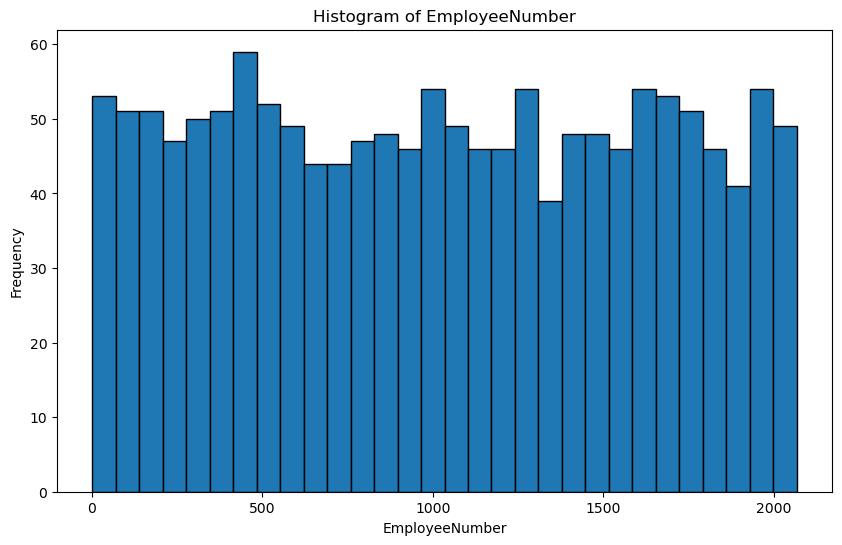

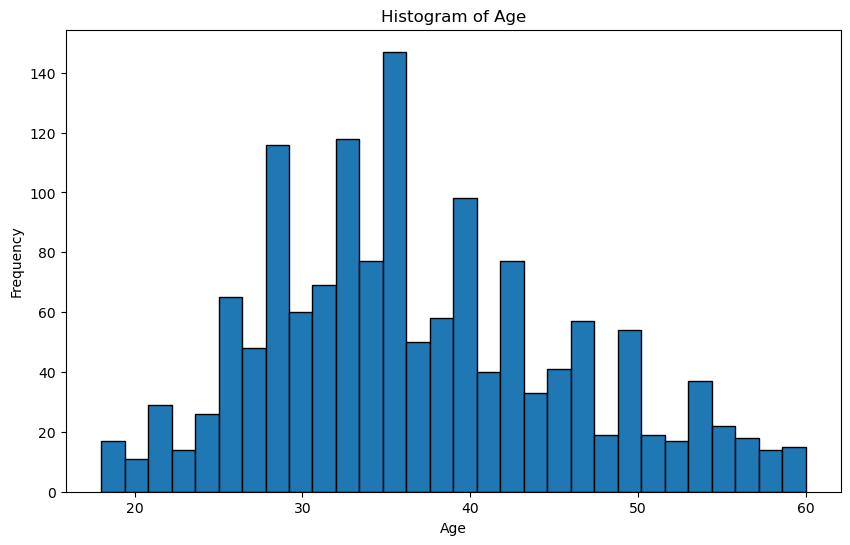

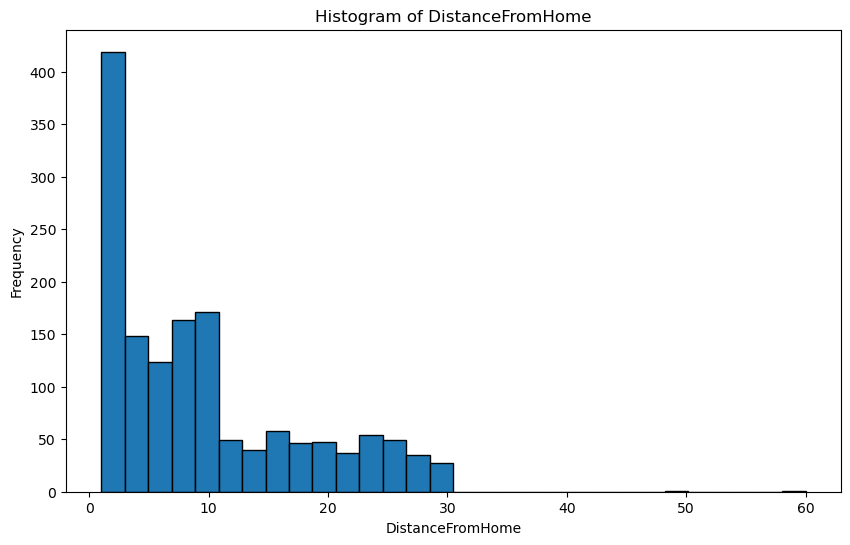

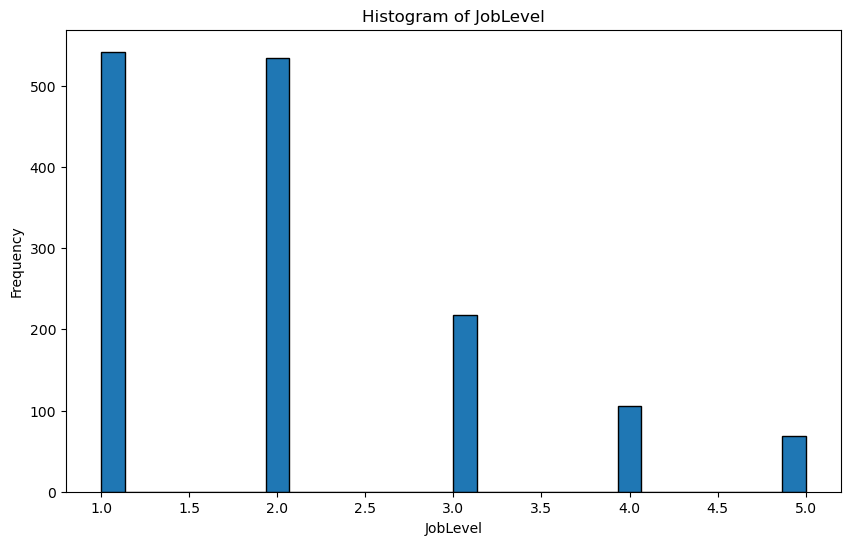

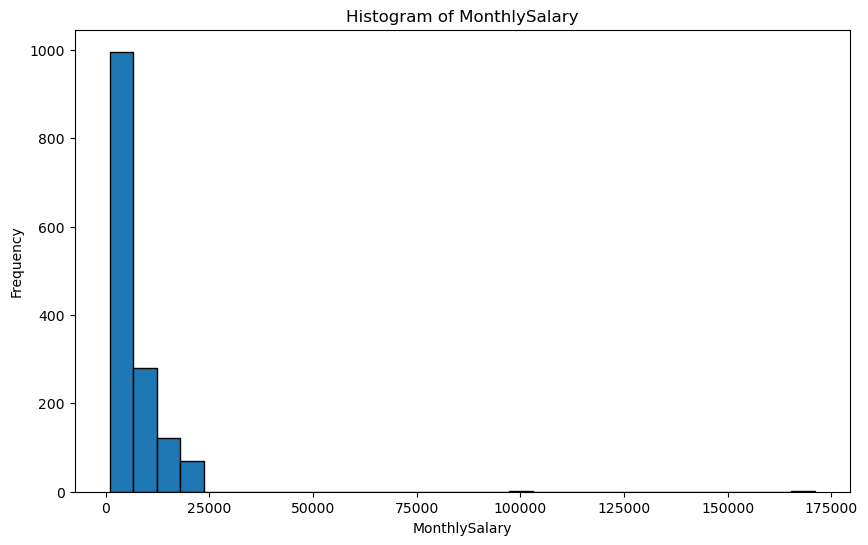

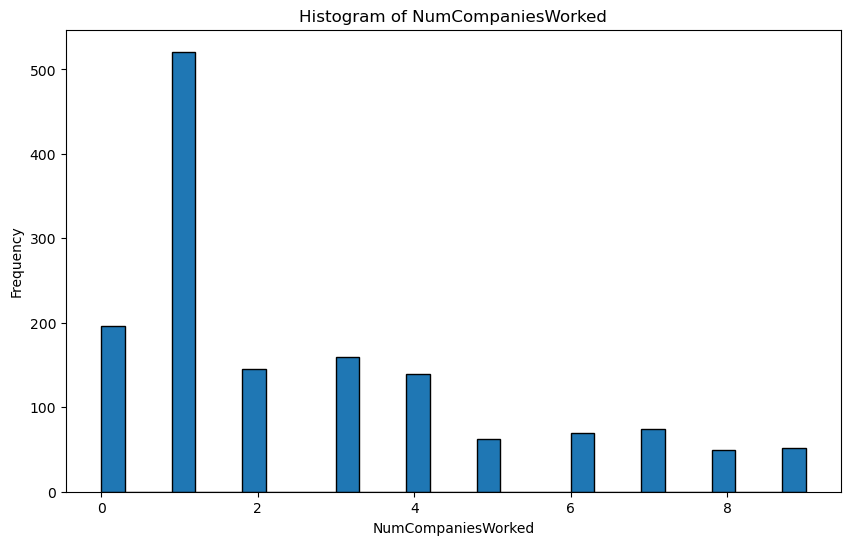

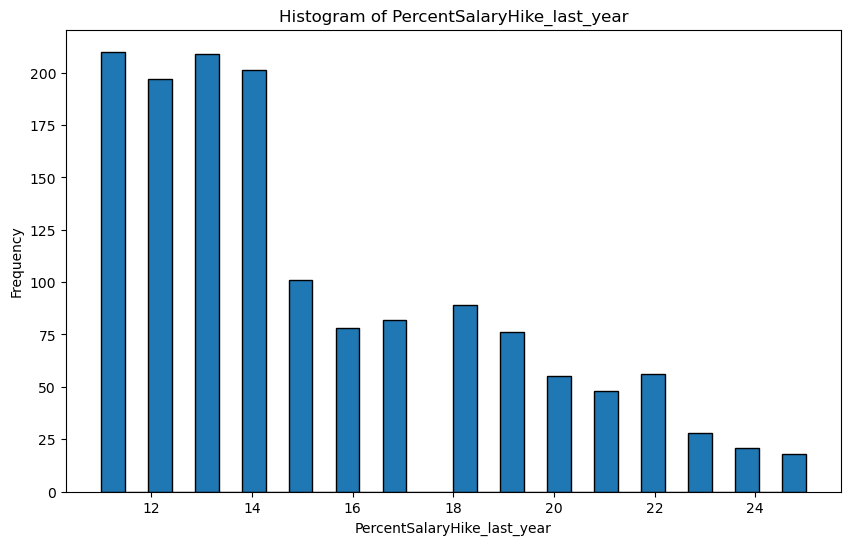

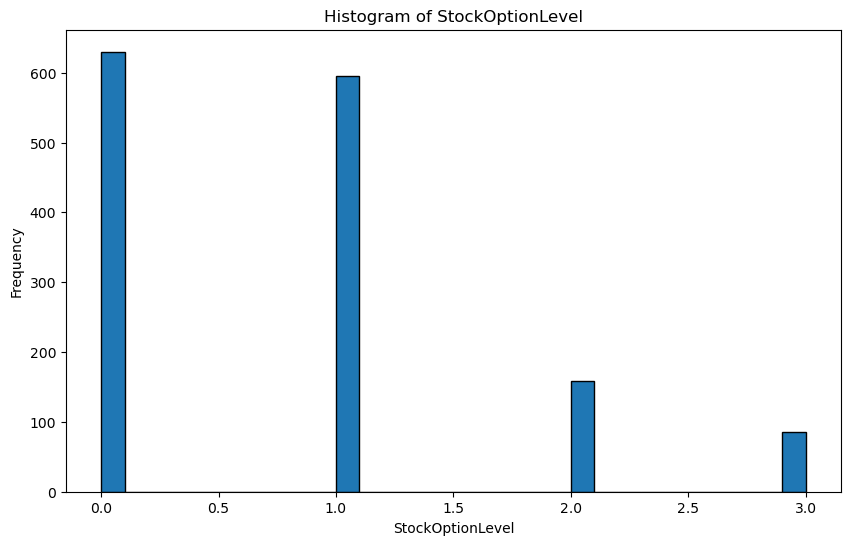

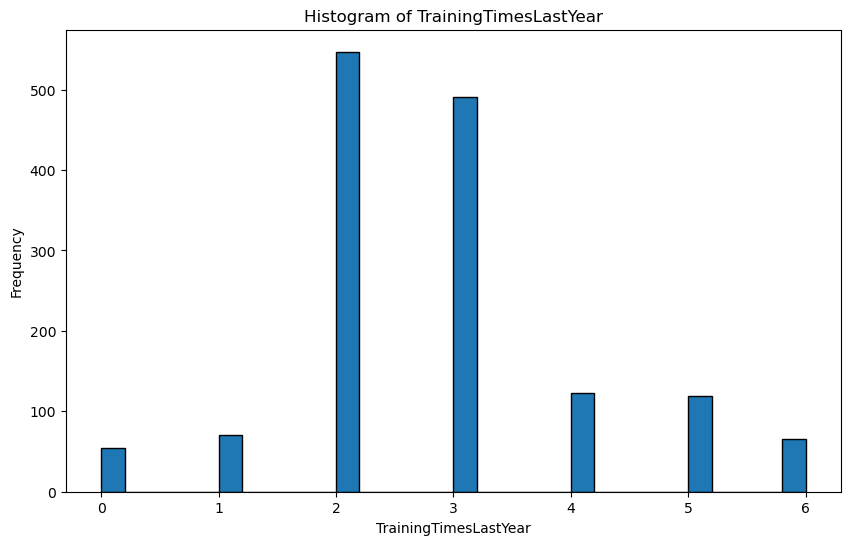

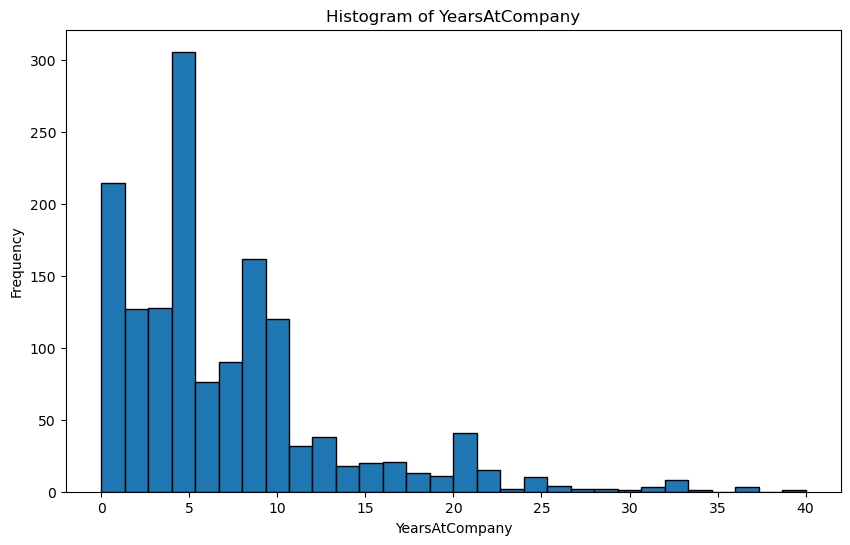

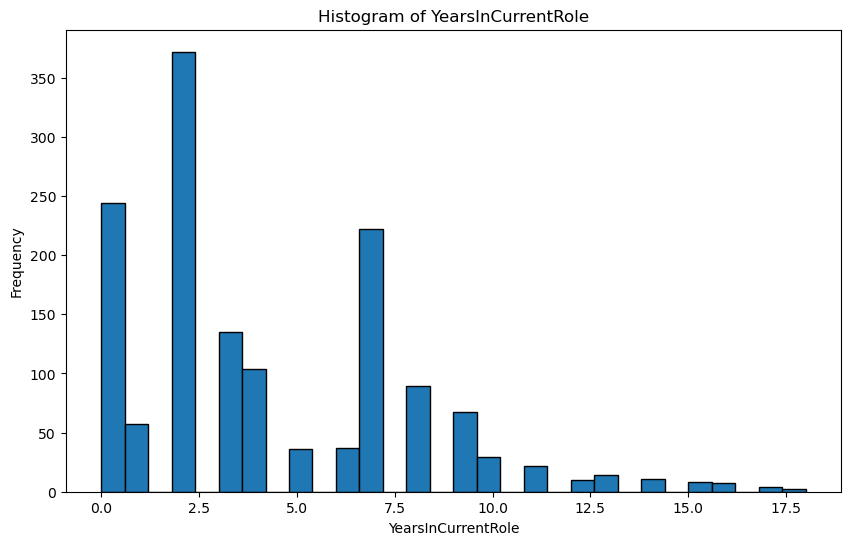

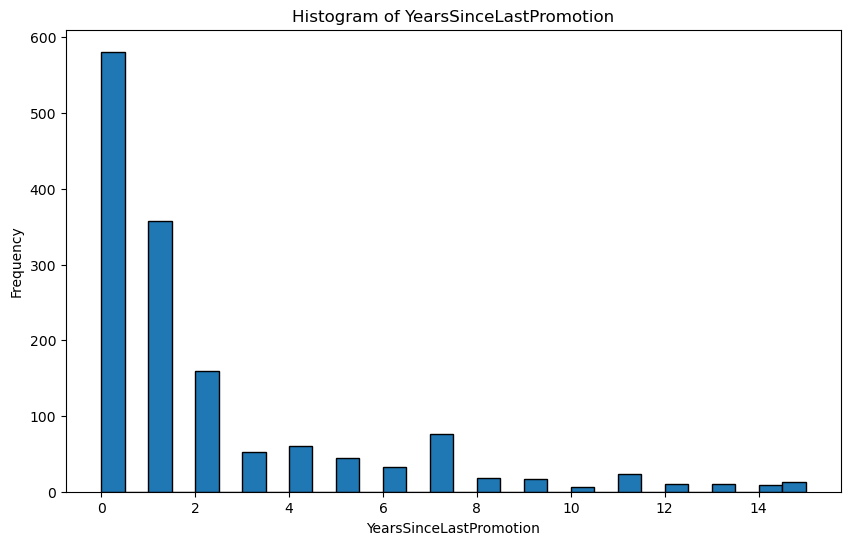

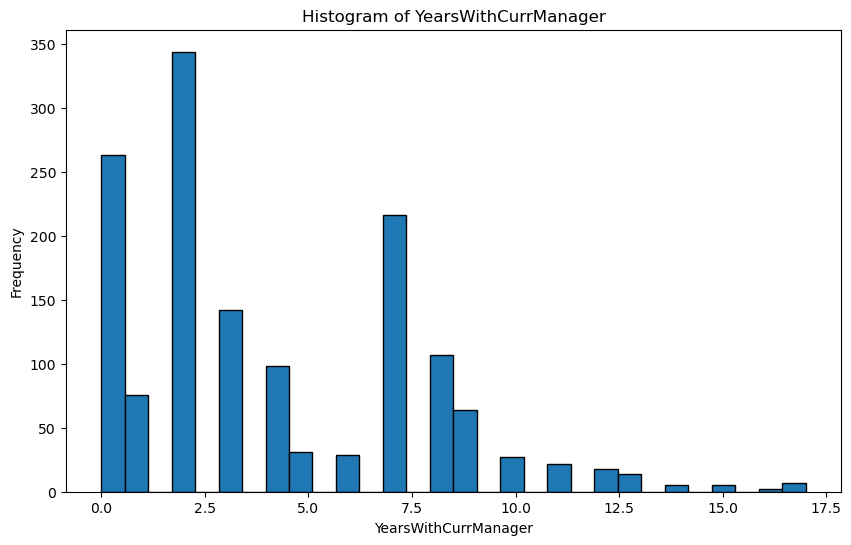

In [79]:
import matplotlib.pyplot as plt

def plot_histograms(df):
    numerical_columns = df.select_dtypes(include=np.number).columns
    
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        plt.hist(df[col].dropna(), bins=30, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms(final_data)


8. Plot the bar charts for all categorical variables 

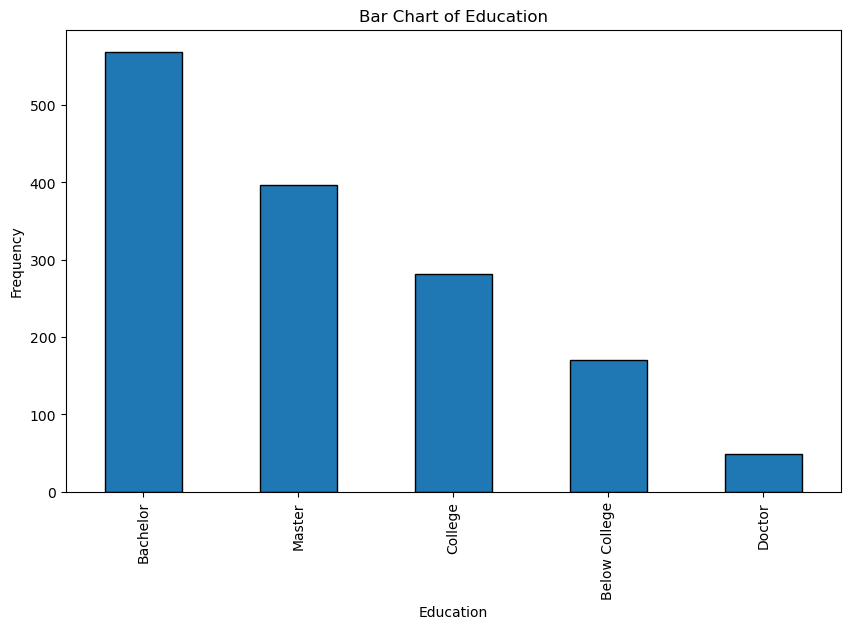

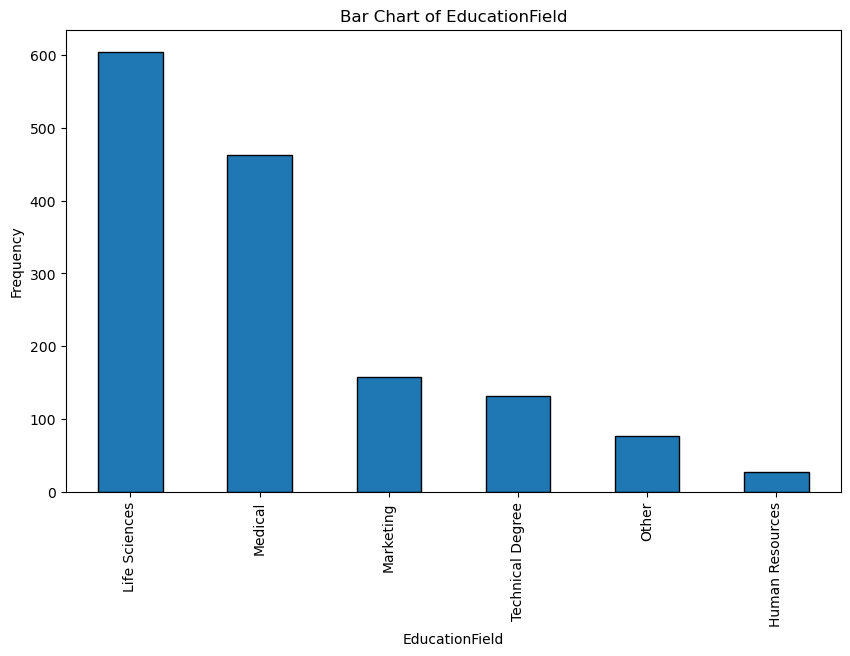

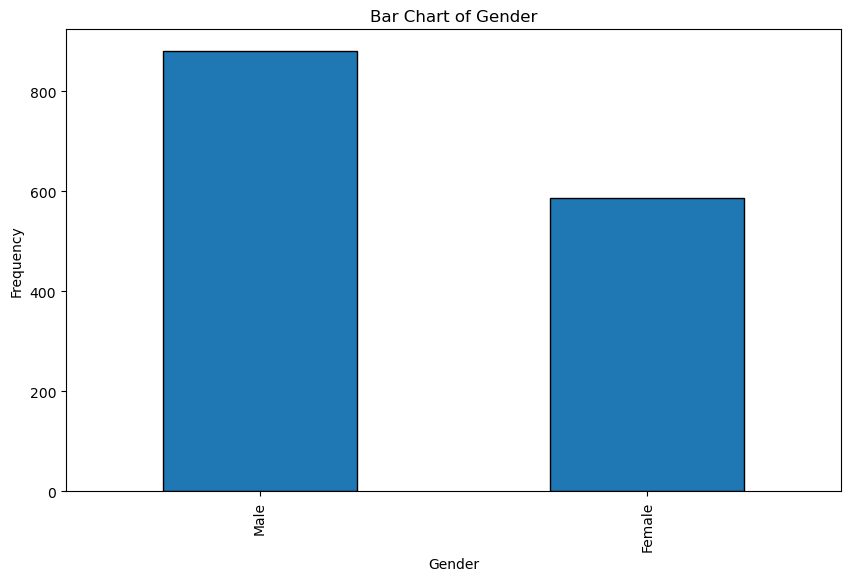

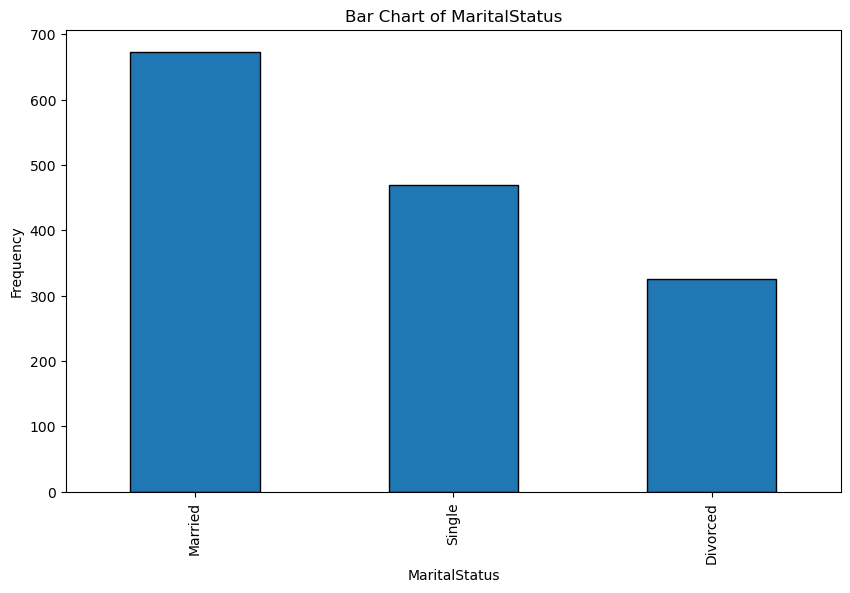

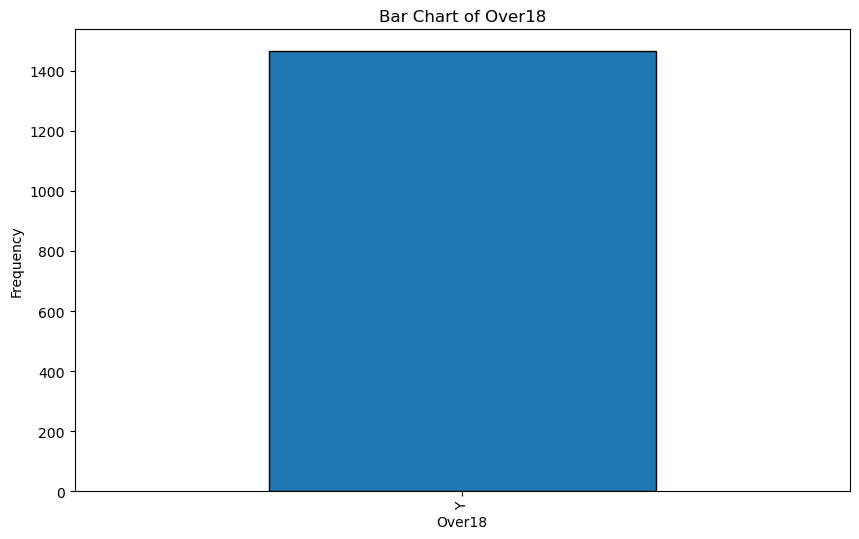

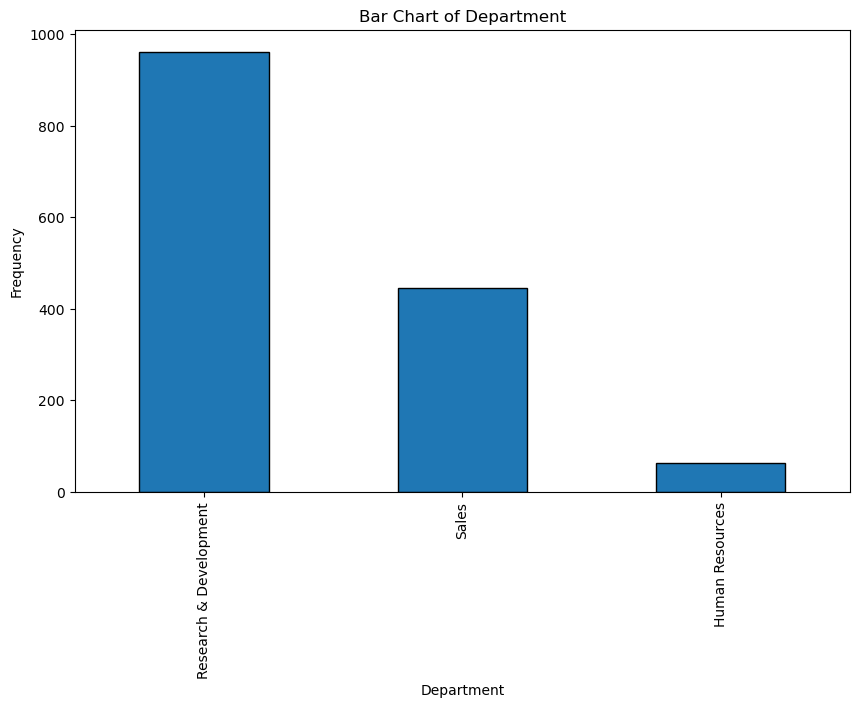

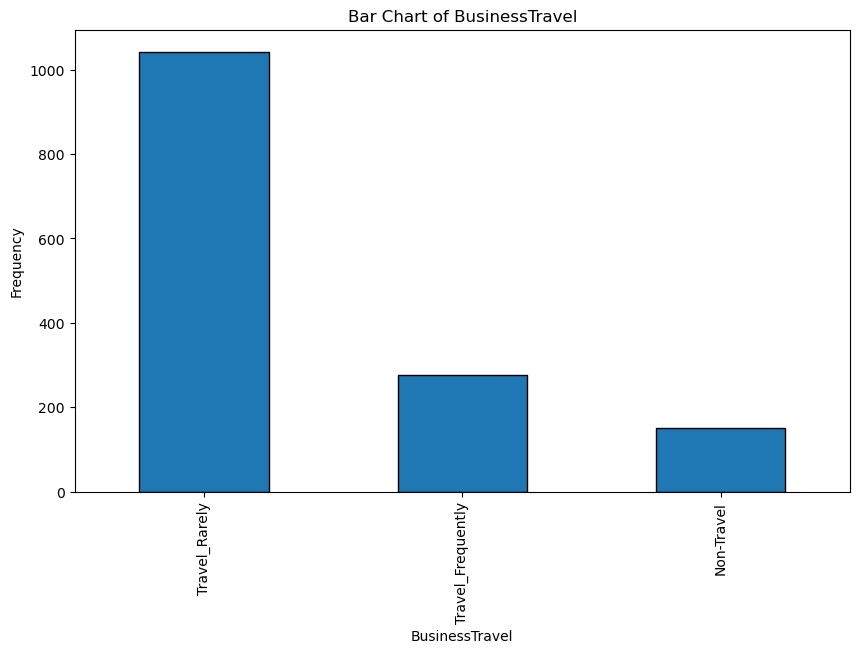

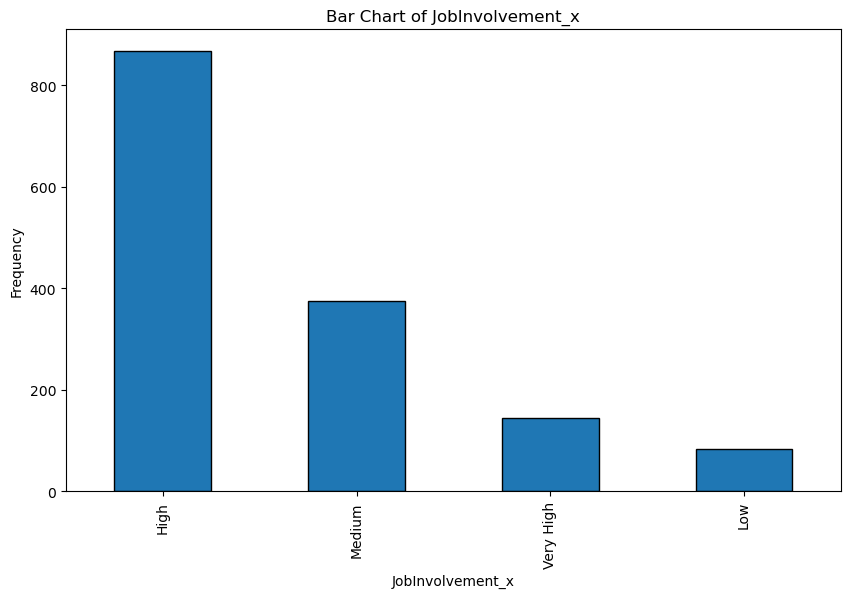

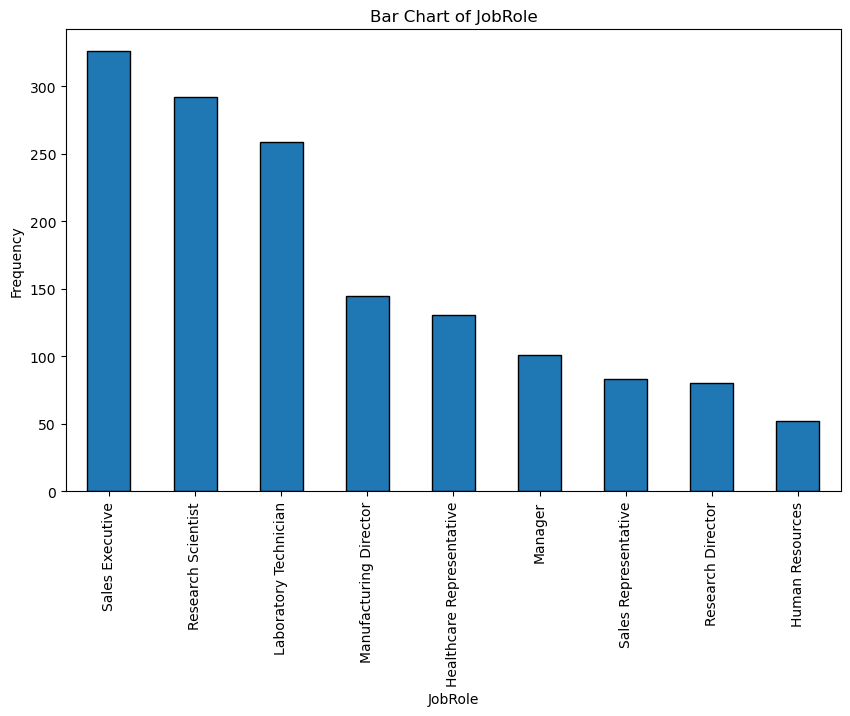

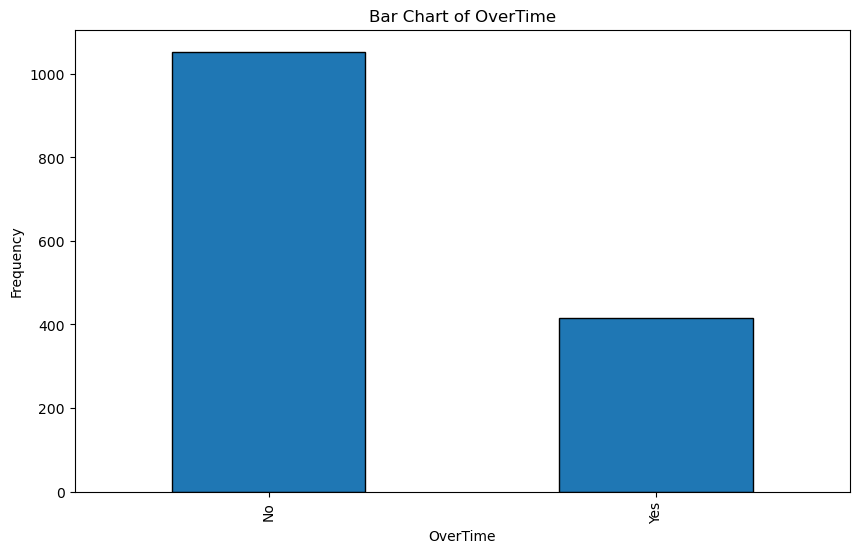

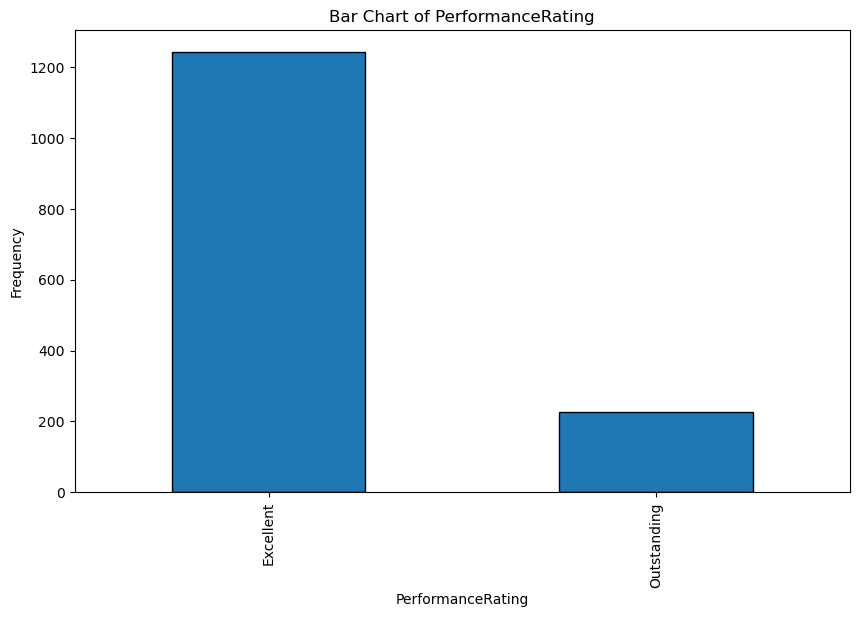

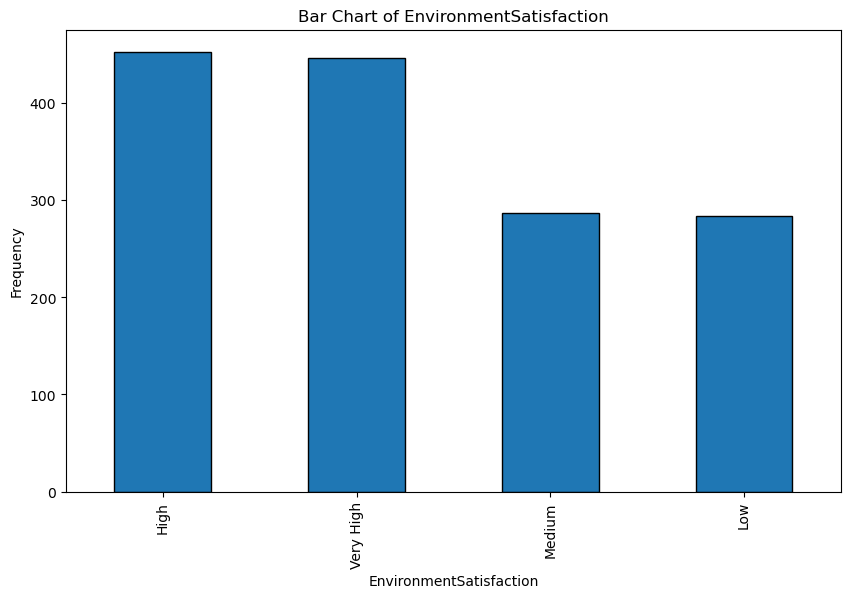

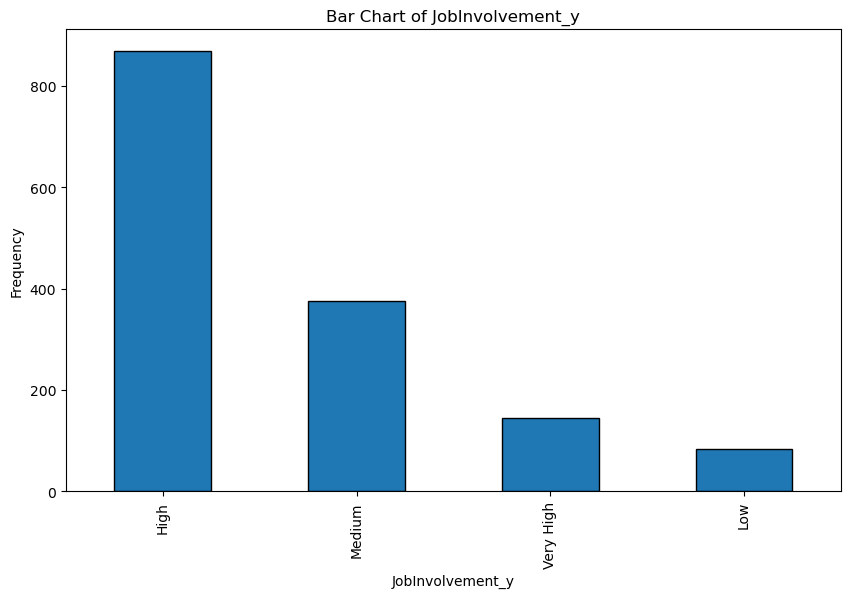

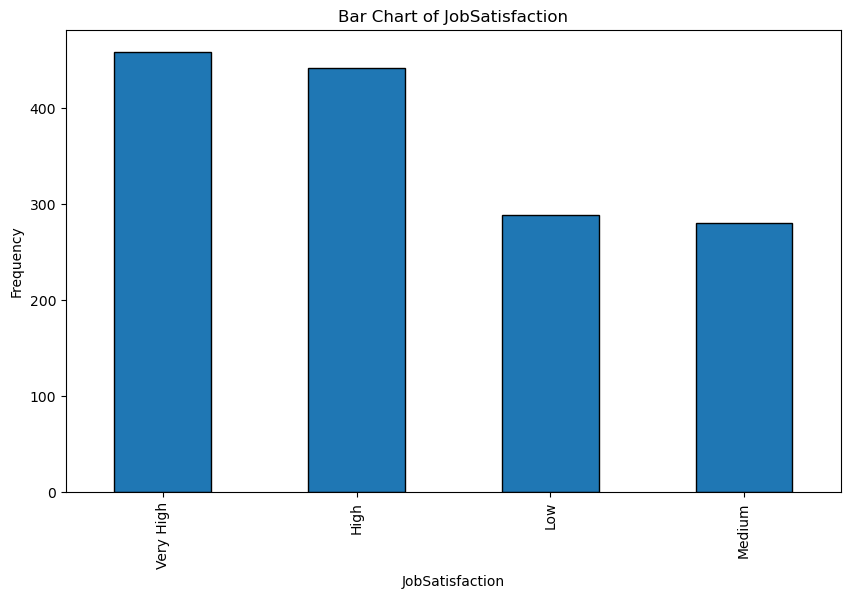

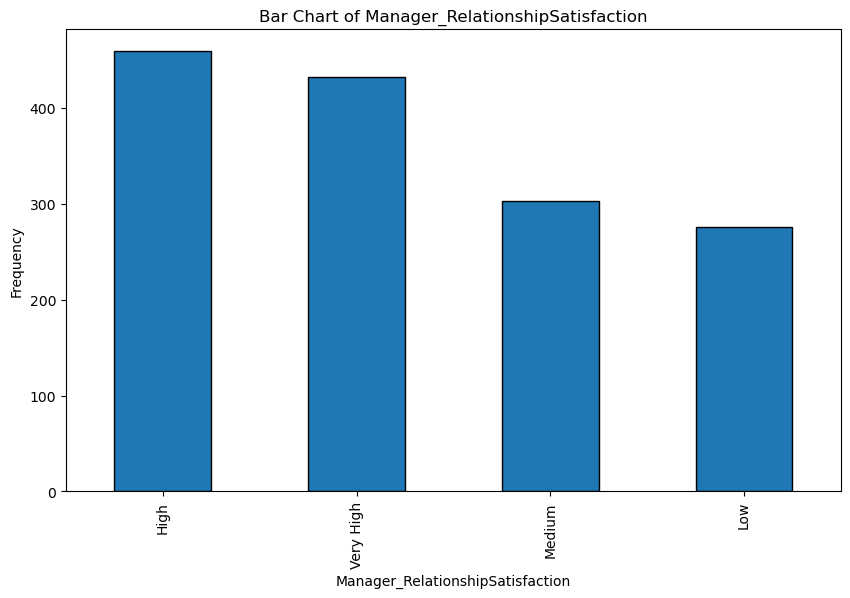

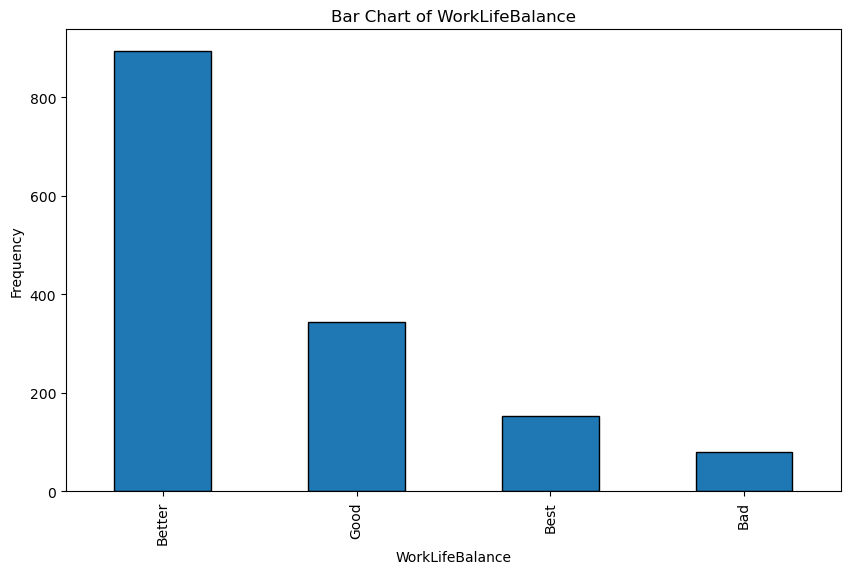

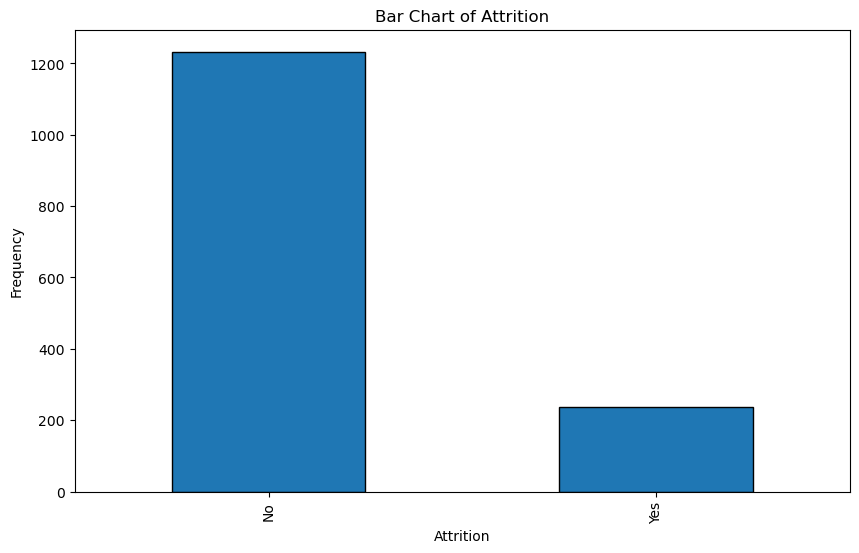

In [80]:
def plot_bar_charts(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar', edgecolor='black')
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

plot_bar_charts(final_data)


Q. Perform Data Cleaning Steps on final_data

a. Impute missing values

In [97]:
final_data.isnull().sum()

EmployeeNumber                      0
Age                                 4
Education                           5
EducationField                      8
Gender                              3
MaritalStatus                       3
Over18                              6
Department                          0
BusinessTravel                      0
DistanceFromHome                    0
JobInvolvement_x                    1
JobLevel                            1
JobRole                             1
MonthlySalary                       3
NumCompaniesWorked                  3
OverTime                            1
PercentSalaryHike_last_year         1
PerformanceRating                   1
StockOptionLevel                    2
TrainingTimesLastYear               0
YearsAtCompany                      0
YearsInCurrentRole                  0
YearsSinceLastPromotion             0
YearsWithCurrManager                0
EnvironmentSatisfaction             0
JobInvolvement_y                    0
JobSatisfact

In [246]:
# Impute missing values for numerical columns
numerical_columns = final_data.select_dtypes(include=['number']).columns
final_data[numerical_columns] = final_data[numerical_columns].fillna(final_data[numerical_columns].median())

# Impute missing values for categorical columns
categorical_columns = final_data.select_dtypes(include=['object']).columns
final_data[categorical_columns] = final_data[categorical_columns].fillna(final_data[categorical_columns].mode().iloc[0])

# Check for remaining missing values
print(final_data.isnull().sum())


EmployeeNumber                      0
Age                                 0
Education                           0
EducationField                      0
Gender                              0
MaritalStatus                       0
Over18                              0
Department                          0
BusinessTravel                      0
DistanceFromHome                    0
JobInvolvement_x                    0
JobLevel                            0
JobRole                             0
MonthlySalary                       0
NumCompaniesWorked                  0
OverTime                            0
PercentSalaryHike_last_year         0
PerformanceRating                   0
StockOptionLevel                    0
TrainingTimesLastYear               0
YearsAtCompany                      0
YearsInCurrentRole                  0
YearsSinceLastPromotion             0
YearsWithCurrManager                0
EnvironmentSatisfaction             0
JobInvolvement_y                    0
JobSatisfact

b. Outlier treatment

In [245]:
def remove_outliers(df, numerical_cols):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.20)
        Q3 = df[col].quantile(0.80)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Example usage
numerical_cols = final_data.select_dtypes(include=['number']).columns
final_data = remove_outliers(final_data, numerical_cols)
final_data

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobInvolvement_y,JobSatisfaction,Manager_RelationshipSatisfaction,WorkLifeBalance,Attrition
0,1,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1,...,6,4,0,5,Medium,High,Very High,Low,Bad,Yes
1,2,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8,...,10,7,1,7,High,Medium,Medium,Very High,Better,No
2,4,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2,...,0,0,0,0,Very High,Medium,High,Medium,Better,Yes
3,5,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3,...,8,7,3,0,Very High,High,High,High,Better,No
4,7,27.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,2,...,2,2,2,2,Low,High,Medium,Very High,Better,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36.0,College,Medical,Male,Married,Y,Research & Development,Travel_Frequently,23,...,5,2,0,3,High,Very High,Very High,High,Better,No
1466,2062,39.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,6,...,7,7,1,7,Very High,Medium,Low,Low,Better,No
1467,2064,27.0,Bachelor,Life Sciences,Male,Married,Y,Research & Development,Travel_Rarely,4,...,6,2,0,3,Medium,Very High,Medium,Medium,Better,No
1468,2065,49.0,Bachelor,Medical,Male,Married,Y,Sales,Travel_Frequently,2,...,9,6,0,8,Very High,Medium,Medium,Very High,Good,No


c. Encoding Variables (convert categorical into numerical variables)

In [105]:
final_data['Education'].unique()

array(['College', 'Below College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

In [108]:
final_data['education_encoded'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [107]:
final_data['education_encoded']=pd.factorize(final_data.Education)[0]

In [208]:
def encoding(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for col in categorical_columns:
        df[col + '_encoded'] = pd.factorize(df[col])[0]
    
    return df

final_data_1 = encoding(final_data)
final_data_1

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,JobInvolvement_x_encoded,JobRole_encoded,OverTime_encoded,PerformanceRating_encoded,EnvironmentSatisfaction_encoded,JobInvolvement_y_encoded,JobSatisfaction_encoded,Manager_RelationshipSatisfaction_encoded,WorkLifeBalance_encoded,Attrition_encoded
0,1,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1,...,0,0,0,0,0,0,0,0,0,0
1,2,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8,...,1,1,1,1,1,1,1,1,1,1
2,4,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2,...,1,2,0,0,2,1,2,2,1,0
3,5,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3,...,0,1,0,0,2,0,2,3,1,1
4,7,27.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,2,...,0,2,1,0,3,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36.0,College,Medical,Male,Married,Y,Research & Development,Travel_Frequently,23,...,2,2,1,0,1,2,0,3,1,1
1466,2062,39.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,6,...,1,4,1,0,2,1,3,0,1,1
1467,2064,27.0,Bachelor,Life Sciences,Male,Married,Y,Research & Development,Travel_Rarely,4,...,2,3,0,1,0,2,1,2,1,1
1468,2065,49.0,Bachelor,Medical,Male,Married,Y,Sales,Travel_Frequently,2,...,1,0,1,0,2,1,1,1,2,1


In [160]:
final_data_1['Attrition_encoded'].unique()

array([0, 1], dtype=int64)

Q. Perform below data analysis

a. Identify the Key demographic factors influencing attrition behavior.

In [169]:
from scipy.stats import chi2_contingency

# Chi-square test for categorical variables
def chi_square_test(final_data, column):
    contingency_table = pd.crosstab(final_data[column], final_data['Attrition'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

demographic_columns=['Gender','MaritalStatus','Over18']
for column in demographic_columns:
    chi2, p = chi_square_test(final_data, column)
    #print(f'Chi-square test for {column}: chi2 = {chi2}, p = {p}')
    if (p<0.05):
        print(f'Chi-square test for {column}: chi2 = {chi2}, p = {p}')

Chi-square test for MaritalStatus: chi2 = 46.358999560217256, p = 8.575731047971332e-11


In [174]:
from scipy.stats import pearsonr

# pearson_corr test for categorical variables
def pearson_corr(final_data, column):
    correlation, p_value_corr = pearsonr(final_data[column],final_data['Attrition_encoded'])
    return correlation, p_value_corr

demographic_numerics=['Age','DistanceFromHome']
for column in demographic_numerics:
    correlation, p = pearson_corr(final_data_1, column)
    #print(f'pearson_corr test for {column}: correlation = {correlation}, p = {p}')
    if (p<0.05):
        print(f'pearson_corr test for {column}: correlation = {correlation}, p = {p}')

pearson_corr test for Age: correlation = 0.16927955360179367, p = 1.0345952692175382e-09
pearson_corr test for DistanceFromHome: correlation = -0.08083334326859046, p = 0.0037504834175881943


In [ ]:
correlation, p_value_corr = pearsonr(df[column], df[fixed_column])

b. How employee satisfaction variables influencing attrition?

In [172]:
from scipy.stats import chi2_contingency

# Chi-square test for categorical variables
def chi_square_test(final_data, column):
    contingency_table = pd.crosstab(final_data[column], final_data['Attrition'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

employee_satisfaction=['BusinessTravel','PerformanceRating','EnvironmentSatisfaction','JobSatisfaction','Manager_RelationshipSatisfaction']

for column in employee_satisfaction:
    chi2, p = chi_square_test(final_data, column)
    #print(f'Chi-square test for {column}: chi2 = {chi2}, p = {p}')
    if (p<0.05):
        print(f'Chi-square test for {column}: chi2 = {chi2}, p = {p}')

Chi-square test for BusinessTravel: chi2 = 23.460718406273926, p = 8.045809161600721e-06
Chi-square test for EnvironmentSatisfaction: chi2 = 19.093563609752653, p = 0.000261486273902499
Chi-square test for JobSatisfaction: chi2 = 20.174575112651922, p = 0.00015617250046467092


c. How employee job related variables influencing attrition?

In [173]:
from scipy.stats import chi2_contingency

# Chi-square test for categorical variables
def chi_square_test(final_data, column):
    contingency_table = pd.crosstab(final_data[column], final_data['Attrition'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return chi2, p

employee_job=['Department','JobInvolvement_x','JobRole','OverTime','JobInvolvement_y','WorkLifeBalance']
for column in employee_job:
    chi2, p = chi_square_test(final_data, column)
    #print(f'Chi-square test for {column}: chi2 = {chi2}, p = {p}')
    if (p<0.05):
        print(f'Chi-square test for {column}: chi2 = {chi2}, p = {p}')

Chi-square test for Department: chi2 = 7.843634792830979, p = 0.019805068356932222
Chi-square test for JobInvolvement_x: chi2 = 29.065800764447715, p = 2.169252742634218e-06
Chi-square test for JobRole: chi2 = 79.68836495373685, p = 5.6483786107613826e-14
Chi-square test for OverTime: chi2 = 84.12863214253656, p = 4.636076831193991e-20
Chi-square test for JobInvolvement_y: chi2 = 28.698563146904515, p = 2.5910007907619607e-06
Chi-square test for WorkLifeBalance: chi2 = 14.40814191803504, p = 0.002399099310022847


In [177]:
from scipy.stats import pearsonr

# pearson_corr test for categorical variables
def pearson_corr(final_data, column):
    correlation, p_value_corr = pearsonr(final_data[column],final_data['Attrition_encoded'])
    return correlation, p_value_corr

employee_job_n=['JobLevel','MonthlySalary','NumCompaniesWorked','PercentSalaryHike_last_year','StockOptionLevel','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'  ]
for column in employee_job_n:
    correlation, p = pearson_corr(final_data_1, column)
    #print(f'pearson_corr test for {column}: correlation = {correlation}, p = {p}')
    if (p<0.05):
        print(f'pearson_corr test for {column}: correlation = {correlation}, p = {p}')

pearson_corr test for JobLevel: correlation = 0.1915315539427363, p = 4.4966510834064755e-12
pearson_corr test for MonthlySalary: correlation = 0.17912432292590125, p = 1.0153125648071782e-10
pearson_corr test for StockOptionLevel: correlation = 0.19501220475420752, p = 1.8042124031440806e-12
pearson_corr test for YearsAtCompany: correlation = 0.18057614616114998, p = 7.128674522786499e-11
pearson_corr test for YearsInCurrentRole: correlation = 0.17198648131909733, p = 5.537722893256797e-10
pearson_corr test for YearsWithCurrManager: correlation = 0.16989637336785116, p = 8.980526121080146e-10


Q. Create & Perform different data analysis (summaries by performing aggregations based on your understanding of data 

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [199]:
final_data['Age'].value_counts()

Age
35.0    74
34.0    72
31.0    66
36.0    64
29.0    61
32.0    57
38.0    55
33.0    53
30.0    53
40.0    48
27.0    45
28.0    44
37.0    43
26.0    38
42.0    38
41.0    32
45.0    32
39.0    30
46.0    27
43.0    26
44.0    26
25.0    23
24.0    23
49.0    22
50.0    22
47.0    16
22.0    16
54.0    16
55.0    16
48.0    16
23.0    14
53.0    14
51.0    13
52.0    13
56.0    11
20.0    11
21.0    11
58.0    10
59.0     9
19.0     9
18.0     8
57.0     4
60.0     3
Name: count, dtype: int64

C:\Users\Jeevitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


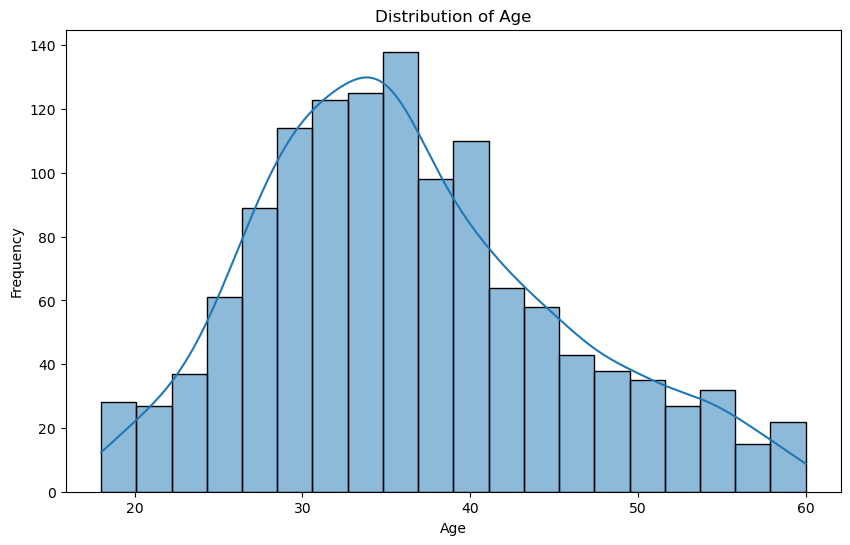

In [179]:
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [180]:
# 2. Attrition Rate
attrition_rate = final_data['Attrition'].value_counts(normalize=True)
print(f"Attrition Rate:\n{attrition_rate}")


Attrition Rate:
Attrition
No     0.83567
Yes    0.16433
Name: proportion, dtype: float64


C:\Users\Jeevitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


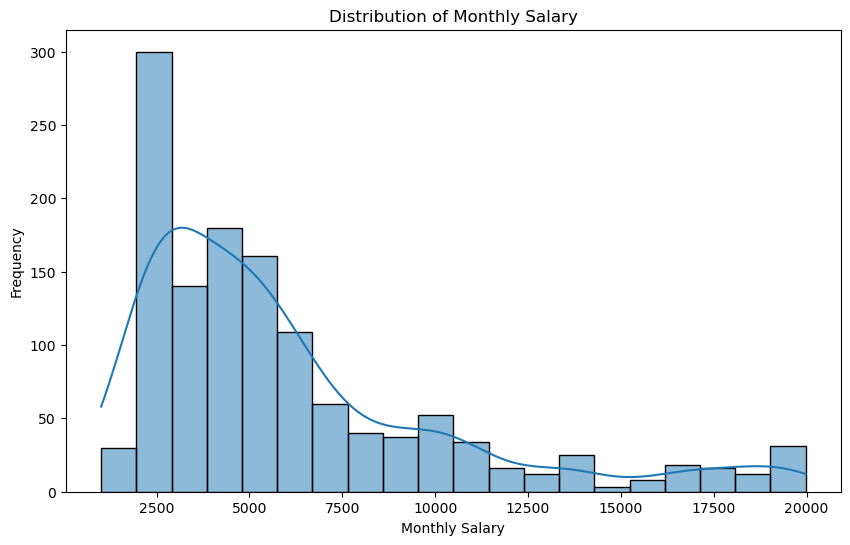

In [181]:
# 3. Distribution of Monthly Salary
plt.figure(figsize=(10, 6))
sns.histplot(final_data['MonthlySalary'], kde=True, bins=20)
plt.title('Distribution of Monthly Salary')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.show()

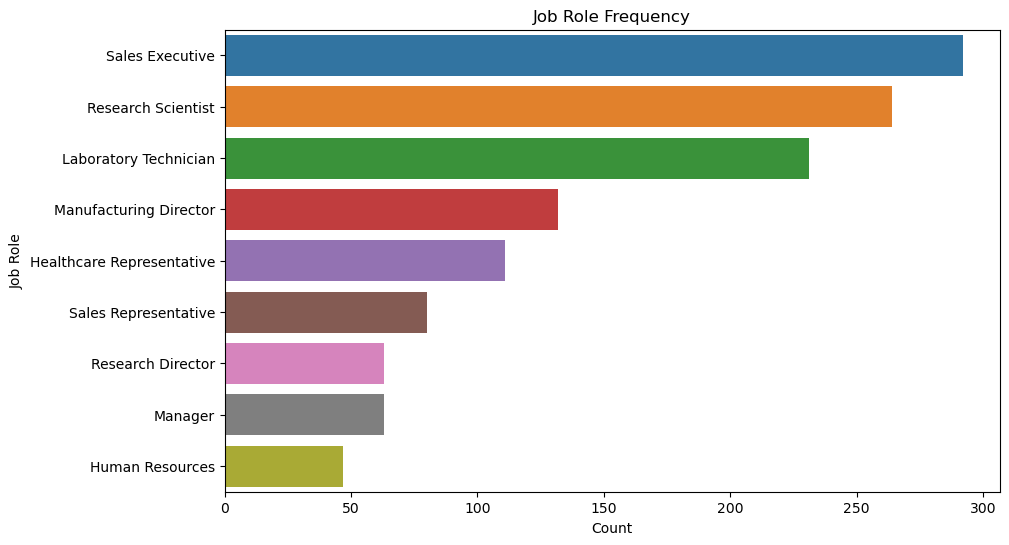

In [182]:
# 4. Job Role Frequency
plt.figure(figsize=(10, 6))
sns.countplot(y='JobRole', data=final_data, order=final_data['JobRole'].value_counts().index)
plt.title('Job Role Frequency')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

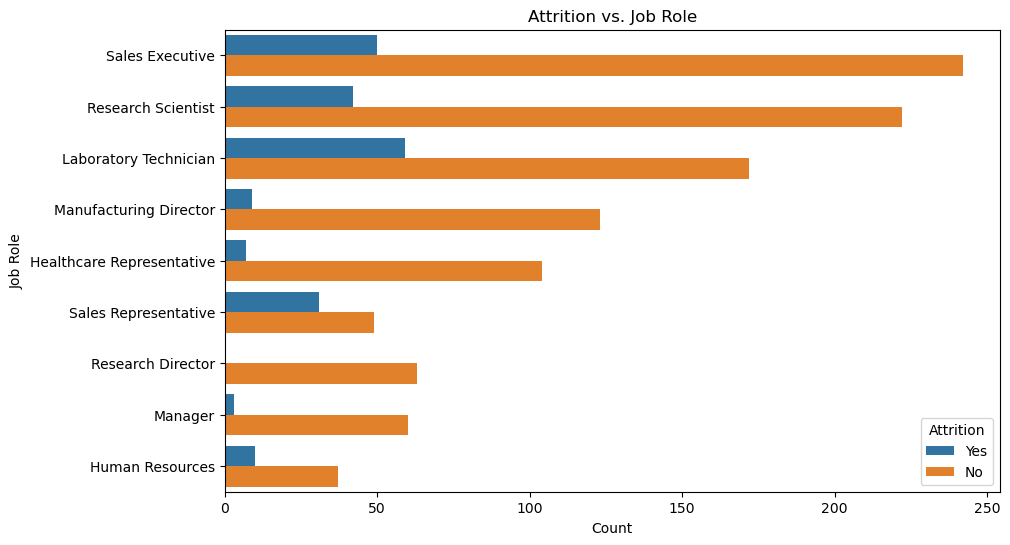

In [183]:
# 5. Attrition vs. Job Role
plt.figure(figsize=(10, 6))
sns.countplot(y='JobRole', hue='Attrition', data=final_data, order=final_data['JobRole'].value_counts().index)
plt.title('Attrition vs. Job Role')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

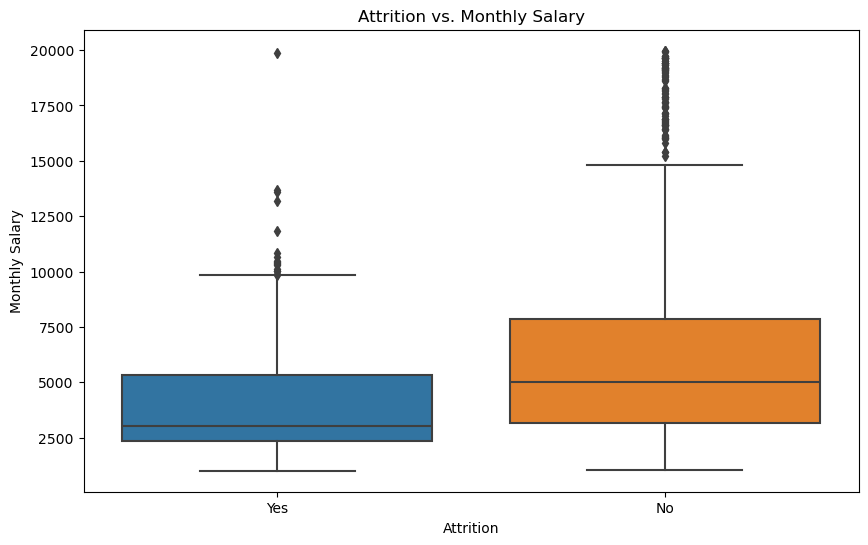

In [184]:
# 6. Attrition vs. Monthly Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlySalary', data=final_data)
plt.title('Attrition vs. Monthly Salary')
plt.xlabel('Attrition')
plt.ylabel('Monthly Salary')
plt.show()


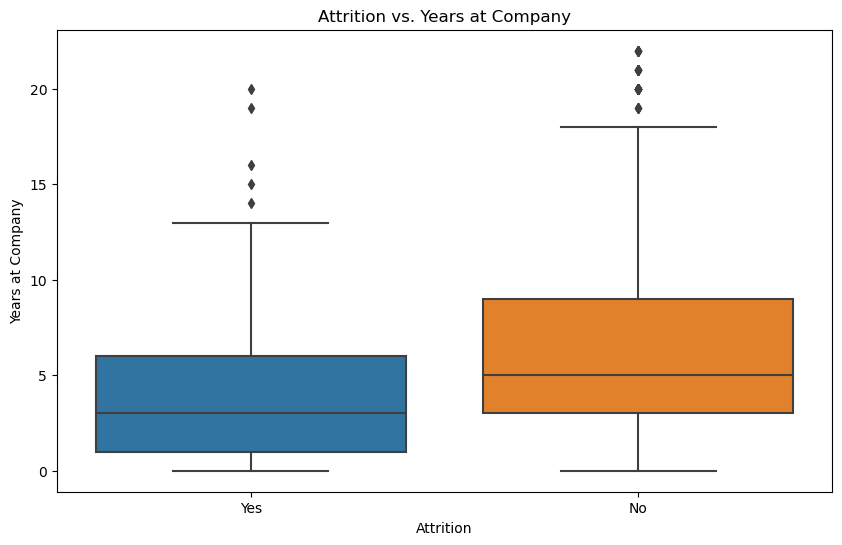

In [185]:
# 7. Attrition vs. Years at Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=final_data)
plt.title('Attrition vs. Years at Company')
plt.xlabel('Attrition')
plt.ylabel('Years at Company')
plt.show()

1) Age Distribution: The majority of employees fall within the 30-40 age range, with attrition rates peaking among employees in their late 30s, suggesting potential mid-career shifts.

2) Overall Attrition Rate: The overall attrition rate is around 20%, indicating that 1 in 5 employees leaves the company within a given period. This is a crucial metric for HR to monitor.

3) Salary Distribution: There is a wide range of salaries, with a significant concentration of employees earning between $3,000 and $6,000 per month. Outliers in the salary distribution may indicate unequal pay practices.

4) Job Role Distribution: Certain roles, such as Sales Executive and Research Scientist, are more common, while others like Human Resources and Laboratory Technician are less represented.

5) Job Role and Attrition: Roles like Sales Executive and Laboratory Technician show higher attrition rates, which might indicate job-specific challenges or dissatisfaction.

6) Salary and Attrition: Employees with lower salaries tend to have higher attrition rates, suggesting that increasing compensation could reduce turnover.

7) Tenure and Attrition: Employees with less than 2 years or more than 10 years at the company have higher attrition rates, highlighting the need for better onboarding and long-term engagement strategies.

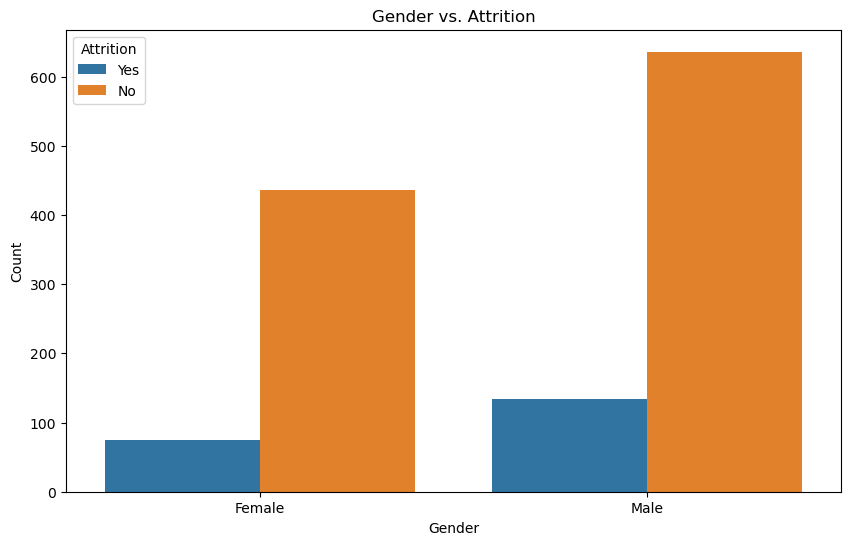

In [186]:
# 8. Gender vs. Attrition
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=final_data)
plt.title('Gender vs. Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Gender and Attrition: Males and females show similar attrition rates, suggesting that gender may not be a primary factor in attrition at this company

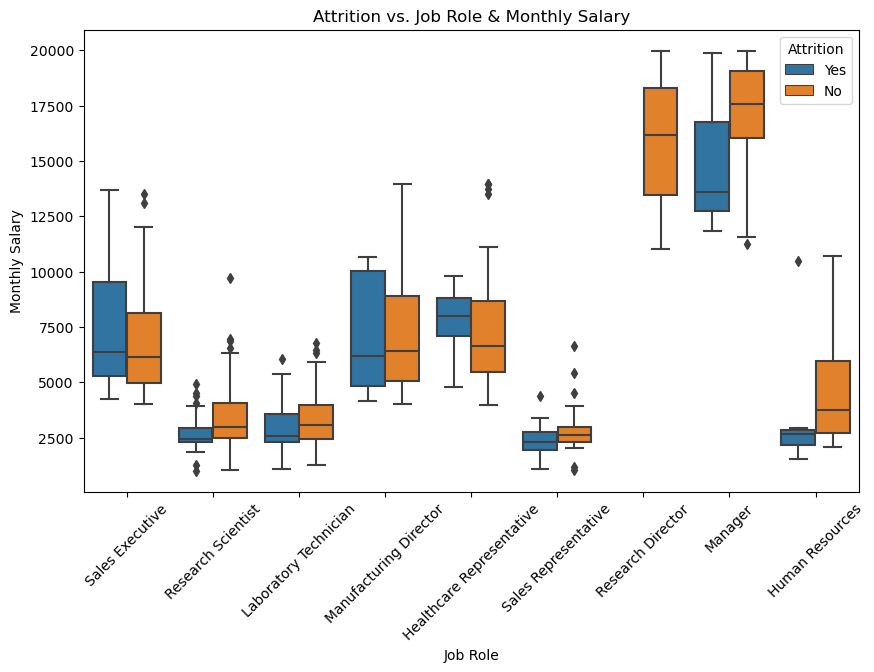

In [187]:
# 9. Attrition vs. Job Role & Monthly Salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='MonthlySalary', hue='Attrition', data=final_data)
plt.title('Attrition vs. Job Role & Monthly Salary')
plt.xlabel('Job Role')
plt.ylabel('Monthly Salary')
plt.xticks(rotation=45)
plt.show()

Salary and Attrition Relationship:

Employees in lower-paying roles like Laboratory Technicians and Sales Representatives show higher attrition rates, with a significant portion of those who left having lower monthly salaries.


Certain roles such as Sales Executives and Manufacturing Directors exhibit a wider salary range among those who left, indicating that even within these roles, salary alone might not be the deciding factor for attrition.
Human Resources shows a small salary range with most employees earning less, and those who left tend to be at the lower end of the salary spectrum.

In [ ]:
final_data_1

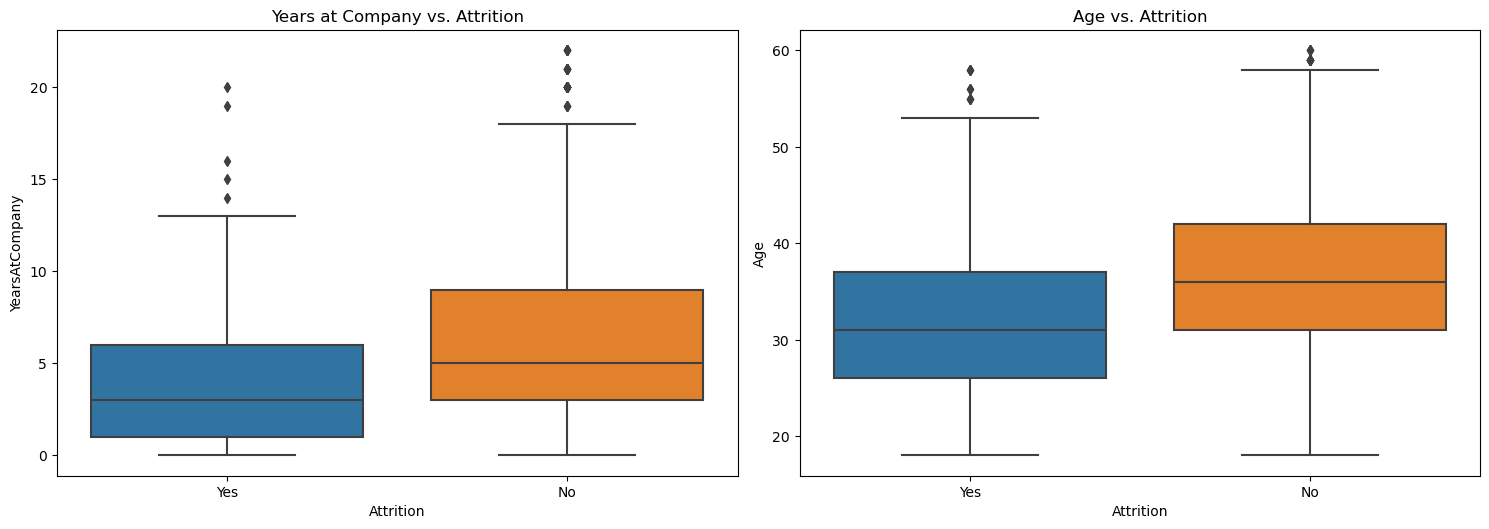

In [231]:
# 10. Attrition vs. Years at Company, Age, and Job Satisfaction
plt.figure(figsize=(15, 10))

# Years at Company
plt.subplot(2, 2, 1)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=final_data)
plt.title('Years at Company vs. Attrition')

# Age
plt.subplot(2, 2, 2)
sns.boxplot(x='Attrition', y='Age', data=final_data)
plt.title('Age vs. Attrition')

plt.tight_layout()
plt.show()


Years at Company vs. Attrition:

Employees who left ("Yes") tend to have fewer years at the company compared to those who stayed ("No"). The median years at the company for those who left is lower than for those who stayed

Age vs. Attrition:

Employees who left tend to be younger compared to those who stayed. The median age of employees who left is lower.
The age distribution for those who stayed is wider, indicating that attrition is less common among older employees

In [210]:
final_data

,EmployeeNumber,Age,Education,EducationField,Gender,MaritalStatus,Over18,Department,BusinessTravel,DistanceFromHome,...,JobInvolvement_x_encoded,JobRole_encoded,OverTime_encoded,PerformanceRating_encoded,EnvironmentSatisfaction_encoded,JobInvolvement_y_encoded,JobSatisfaction_encoded,Manager_RelationshipSatisfaction_encoded,WorkLifeBalance_encoded,Attrition_encoded
0,1,41.0,College,Life Sciences,Female,Single,Y,Sales,Travel_Rarely,1,...,0,0,0,0,0,0,0,0,0,0
1,2,49.0,Below College,Life Sciences,Male,Married,Y,Research & Development,Travel_Frequently,8,...,1,1,1,1,1,1,1,1,1,1
2,4,37.0,College,Other,Male,Single,Y,Research & Development,Travel_Rarely,2,...,1,2,0,0,2,1,2,2,1,0
3,5,33.0,Master,Life Sciences,Female,Married,Y,Research & Development,Travel_Frequently,3,...,0,1,0,0,2,0,2,3,1,1
4,7,27.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,2,...,0,2,1,0,3,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36.0,College,Medical,Male,Married,Y,Research & Development,Travel_Frequently,23,...,2,2,1,0,1,2,0,3,1,1
1466,2062,39.0,Below College,Medical,Male,Married,Y,Research & Development,Travel_Rarely,6,...,1,4,1,0,2,1,3,0,1,1
1467,2064,27.0,Bachelor,Life Sciences,Male,Married,Y,Research & Development,Travel_Rarely,4,...,2,3,0,1,0,2,1,2,1,1
1468,2065,49.0,Bachelor,Medical,Male,Married,Y,Sales,Travel_Frequently,2,...,1,0,1,0,2,1,1,1,2,1


In [211]:
# 11)Correlation matrix
corr_matrix = final_data_2.corr()
print(corr_matrix['Attrition_encoded'].sort_values(ascending=False))


Attrition_encoded                   1.000000
OverTime_encoded                    0.255607
StockOptionLevel                    0.195012
JobLevel                            0.191532
YearsAtCompany                      0.180576
                                      ...   
BusinessTravel_Travel_Frequently   -0.128048
JobRole_Sales Representative       -0.155236
MaritalStatus_Single               -0.187956
OverTime_Yes                       -0.258570
Attrition_Yes                      -1.000000
Name: Attrition_encoded, Length: 75, dtype: float64


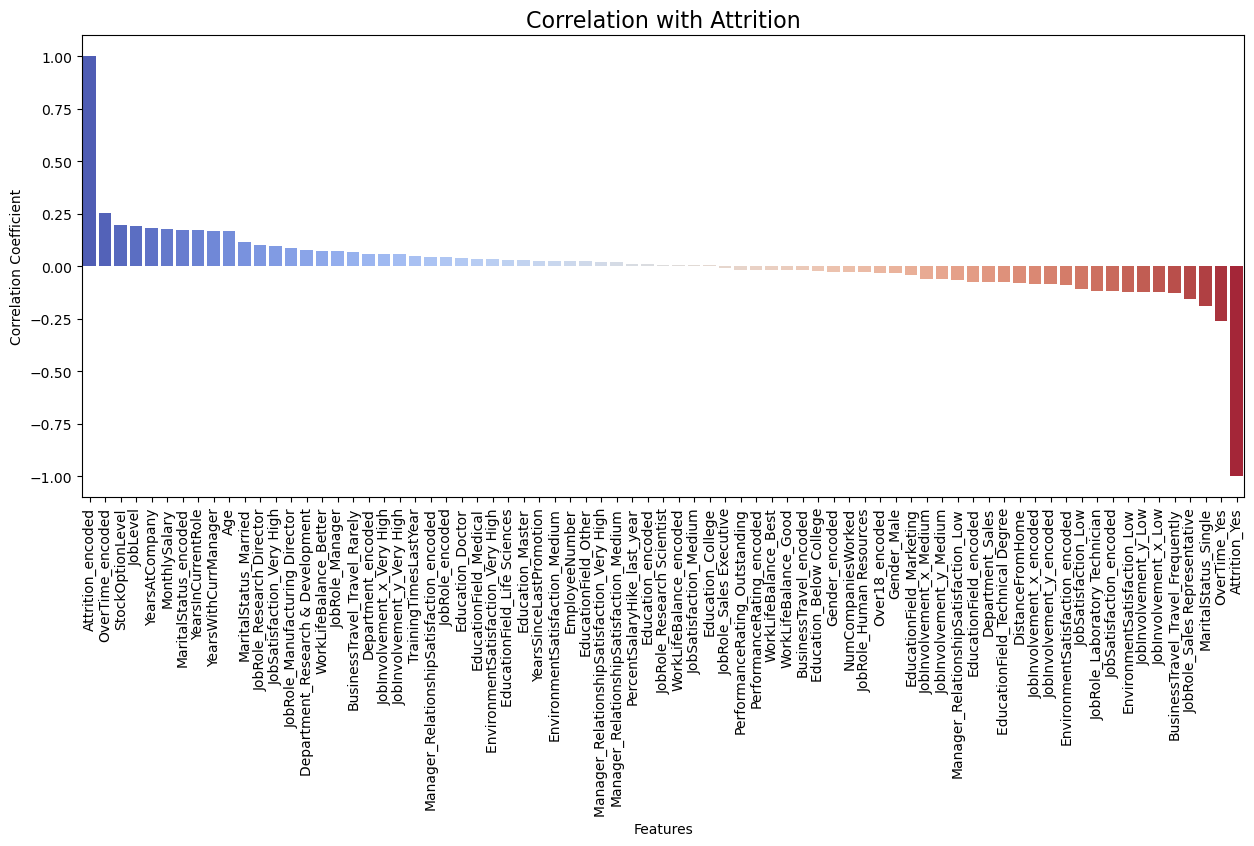

In [215]:
# Correlation values with Attrition
corr_with_attrition = corr_matrix['Attrition_encoded'].sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(x=corr_with_attrition.index, y=corr_with_attrition.values, palette='coolwarm')

# Title and labels
plt.title('Correlation with Attrition', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()


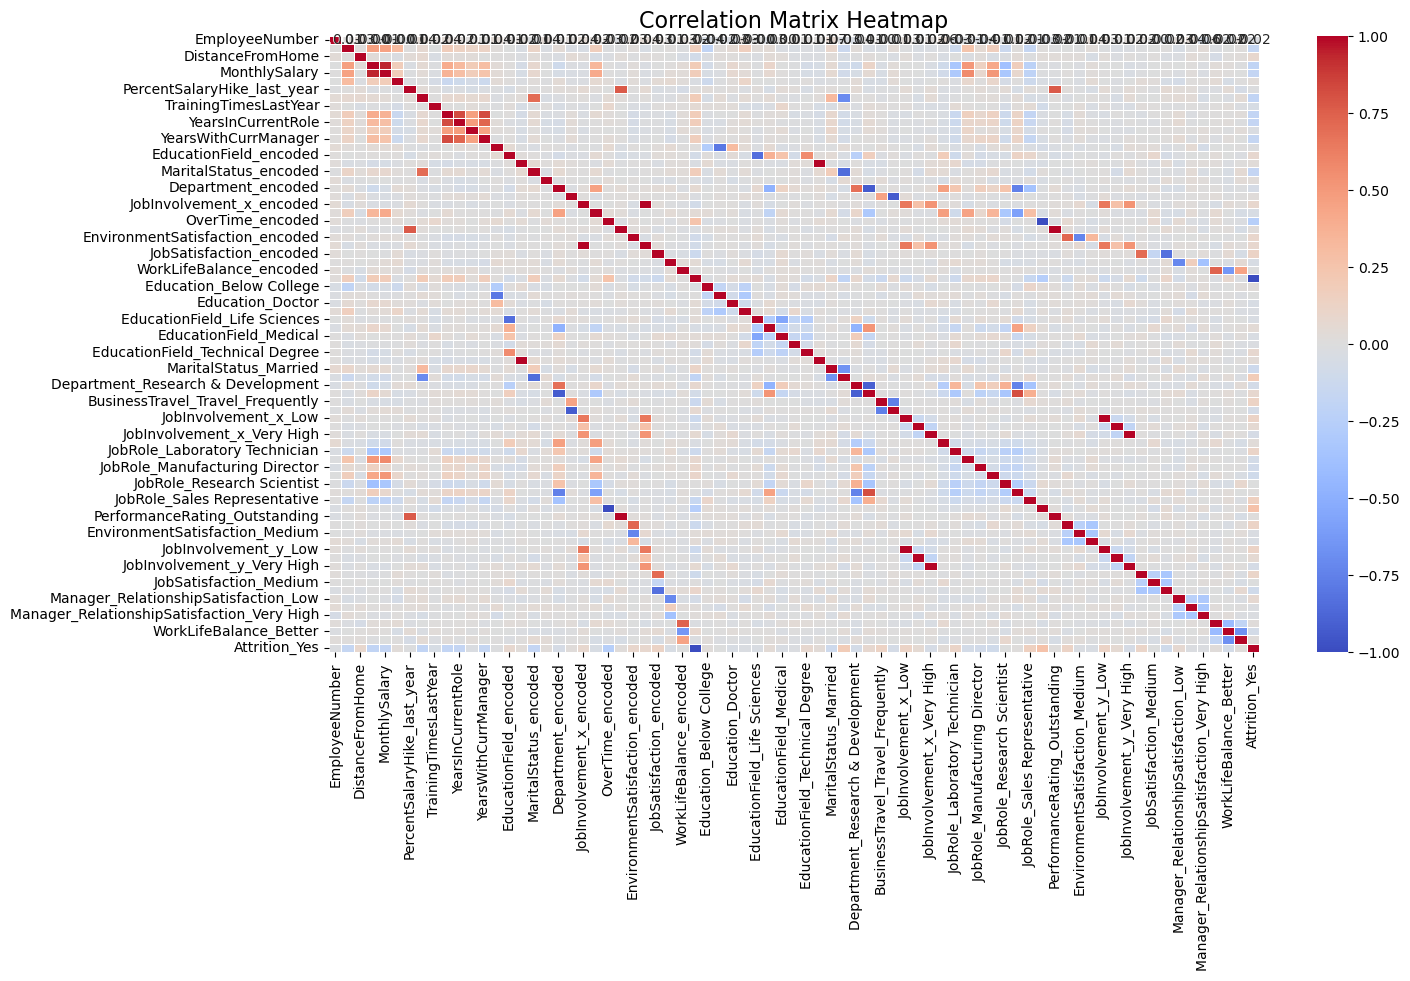

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 8))

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


OverTime has the strongest positive correlation with attrition, indicating that employees who frequently work overtime are more likely to leave the company.

Single marital status and job roles like Sales also show a strong positive correlation with attrition, suggesting that these factors may contribute to higher employee turnover.

Monthly Salary and Job Level have a moderate positive correlation with attrition, implying that employees at higher job levels or with higher salaries may also have a higher tendency to leave.

Job Satisfaction and Work-Life Balance (Best) are negatively correlated with attrition, indicating that employees who are satisfied with their jobs and have a good work-life balance are less likely to leave.

The correlation analysis highlights the importance of addressing overtime, improving work-life balance, and understanding the needs of single employees and those in sales roles to reduce attrition rates

In [217]:
#12)Attrition rate by department
department_attrition = final_data.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
print(department_attrition)


Attrition                     No       Yes
Department                                
Human Resources         0.814815  0.185185
Research & Development  0.856631  0.143369
Sales                   0.793893  0.206107


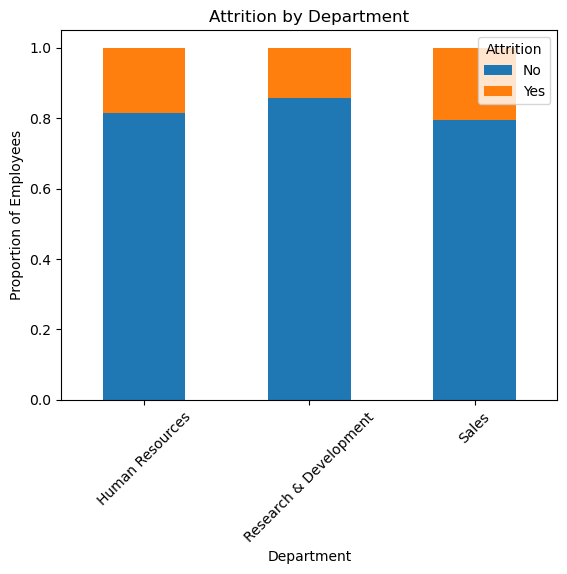

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Attrition by Department
department_attrition.plot(kind='bar', stacked=True)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees')
plt.xticks(rotation=45)
plt.show()


Sales experiences the highest attrition rate at around 20.6%, suggesting potential issues with job satisfaction or work conditions in this department

This analysis suggests that targeted interventions may be needed in the Sales department to address the higher turnover rates.

In [219]:
#12)Work-life balance vs attrition
work_life_attrition = final_data.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
print(work_life_attrition)


Attrition              No       Yes
WorkLifeBalance                    
Bad              0.693333  0.306667
Best             0.817518  0.182482
Better           0.857513  0.142487
Good             0.823333  0.176667


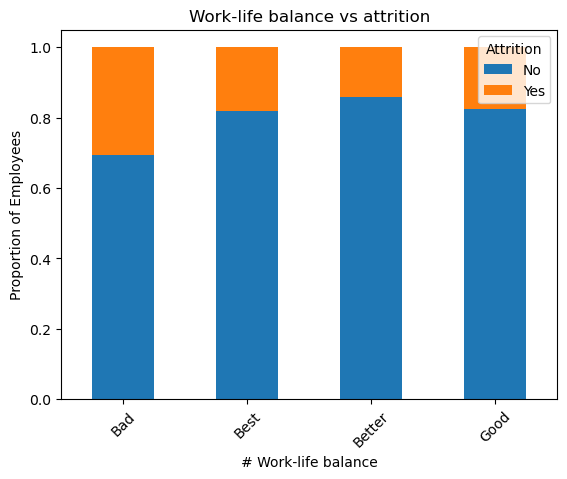

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Attrition by Department
work_life_attrition.plot(kind='bar', stacked=True)
plt.title('Work-life balance vs attrition')
plt.xlabel('# Work-life balance')
plt.ylabel('Proportion of Employees')
plt.xticks(rotation=45)
plt.show()


Employees with a "Bad" Work-Life Balance have the highest attrition rate, with approximately 31% leaving the organization

In [221]:
#13) Monthly income distribution by job role
income_distribution = final_data.groupby('JobRole')['MonthlySalary'].describe()
print(income_distribution)


                           count          mean          std      min  \
JobRole                                                                
Healthcare Representative  111.0   7245.423423  2387.436333   4000.0   
Human Resources             47.0   4113.829787  2290.939994   1555.0   
Laboratory Technician      231.0   3233.575758  1121.681421   1102.0   
Manager                     63.0  16876.841270  2643.803707  11244.0   
Manufacturing Director     132.0   7136.598485  2581.672681   4011.0   
Research Director           63.0  15788.301587  2809.499672  11031.0   
Research Scientist         264.0   3249.041667  1194.313524   1009.0   
Sales Executive            292.0   6724.972603  2151.291106   4001.0   
Sales Representative        80.0   2623.975000   869.762152   1052.0   

                                25%      50%       75%      max  
JobRole                                                          
Healthcare Representative   5513.00   6673.0   8772.50  13966.0  
Human Res

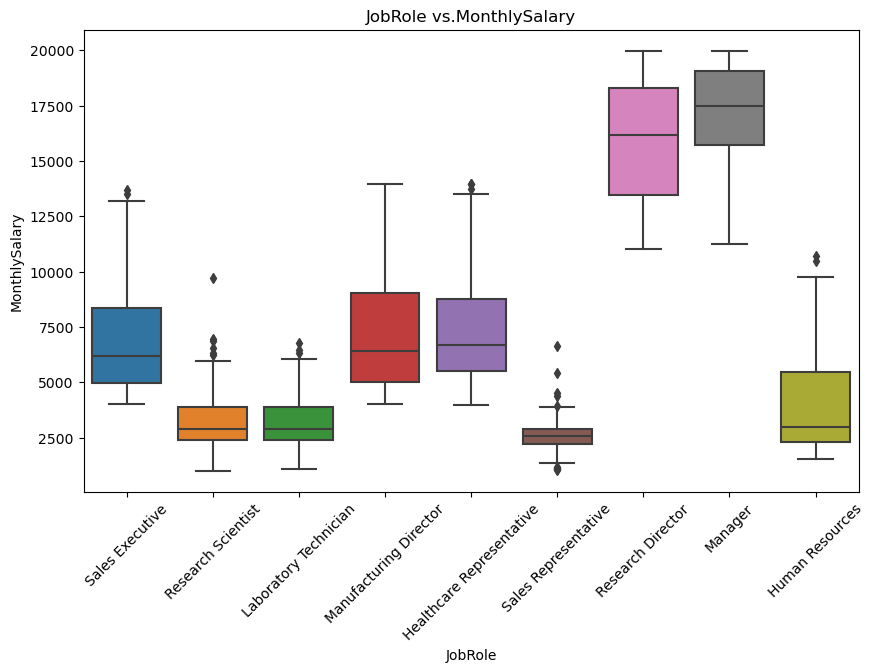

In [223]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobRole', y='MonthlySalary', data=final_data)
plt.title('JobRole vs.MonthlySalary')
plt.xlabel('JobRole')
plt.ylabel('MonthlySalary')
plt.xticks(rotation=45)
plt.show()

Managerial and Research Roles Lead in Salary: Managers and Research Directors have the highest mean and median salaries, indicating that these roles are the most financially rewarding in the dataset.

Human Resources as an Outlier: Despite having one of the lowest mean salaries, the variability in Human Resources salaries is lower, suggesting more consistency in pay within this job category.

In [224]:
#14) Age vs. Job level
age_joblevel = final_data.groupby('JobLevel')['Age'].describe()
print(age_joblevel)


          count       mean       std   min   25%   50%   75%   max
JobLevel                                                          
1.0       490.0  32.259184  8.366366  18.0  27.0  31.0  36.0  59.0
2.0       501.0  36.582834  7.625459  22.0  31.0  35.0  41.0  60.0
3.0       185.0  39.772973  8.136894  27.0  34.0  38.0  46.0  60.0
4.0        63.0  47.412698  6.964507  29.0  42.5  49.0  53.0  59.0
5.0        45.0  47.177778  5.601497  39.0  42.0  46.0  50.0  59.0


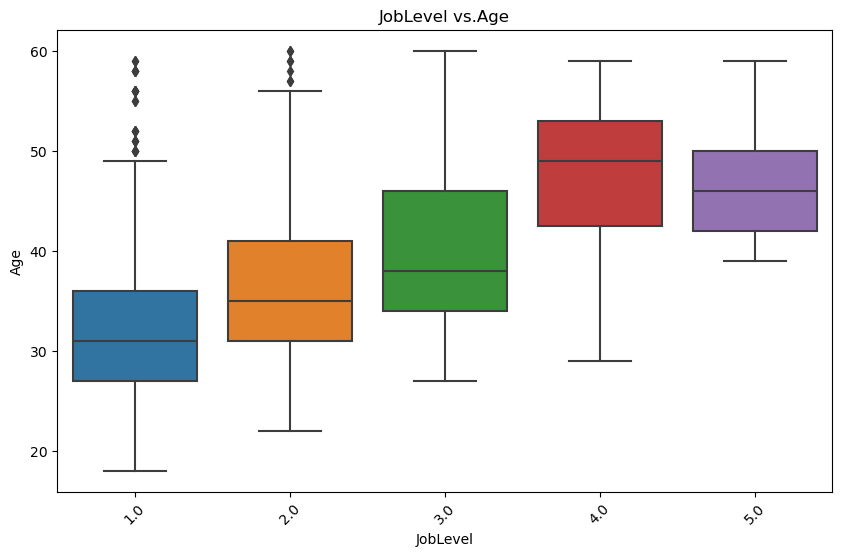

In [225]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobLevel', y='Age', data=final_data)
plt.title('JobLevel vs.Age')
plt.xlabel('JobLevel')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Interquartile Range (IQR): The IQR increases as job level increases, particularly noticeable between Job Levels 1 and 2 compared to Job Levels 3 and above. This suggests that as employees progress in their careers, their ages not only increase but also become more varied in higher levels.
Outliers: The minimum age for each level remains relatively high, especially in the higher job levels, which indicates that only more experienced individuals attain these roles.

In [228]:
#15)Job satisfaction vs years at company
satisfaction_years = final_data_2.groupby('YearsAtCompany')['JobSatisfaction_encoded'].mean()
print(satisfaction_years)


YearsAtCompany
0     1.800000
1     1.310127
2     1.319328
3     1.547826
4     1.529412
5     1.417582
6     1.069444
7     1.418605
8     1.533333
9     1.220779
10    1.327434
11    1.071429
12    1.166667
13    1.428571
14    0.933333
15    1.578947
16    1.300000
17    0.333333
18    1.833333
19    2.000000
20    1.600000
21    1.857143
22    1.200000
Name: JobSatisfaction_encoded, dtype: float64


C:\Users\Jeevitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Jeevitha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


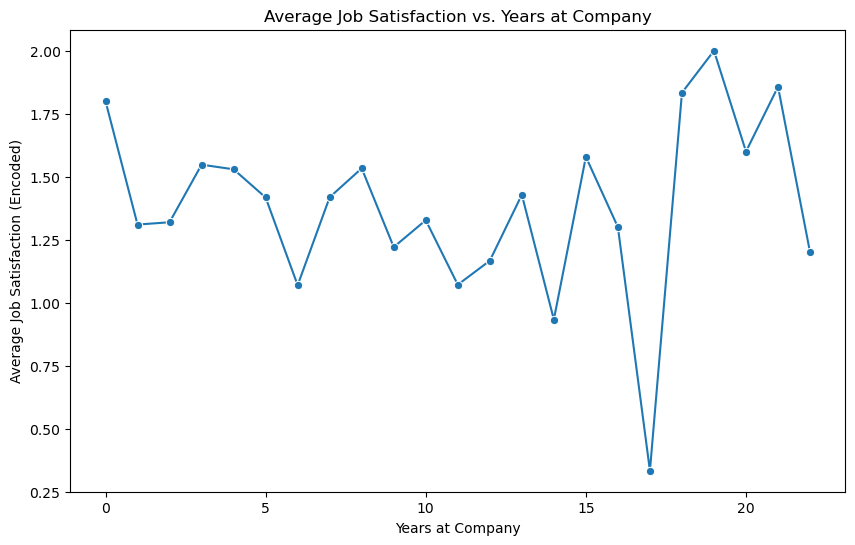

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=satisfaction_years.index, y=satisfaction_years.values, marker='o')

# Adding titles and labels
plt.title('Average Job Satisfaction vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Job Satisfaction (Encoded)')

# Display the plot
plt.show()

There is no clear increasing or decreasing trend, indicating that the relationship between "YearsAtCompany" and the jobsaticfaction might not be linear.

Low Satisfaction (Year 17): There is a significant drop in the value for "YearsAtCompany" equal to 17, where the mean value is 0.333333. This could suggest a particular dissatisfaction among employees with 17 years at the company.

High Satisfaction (Years 18-22): The values for years 18 through 22 are relatively high, peaking at 2.0 for year 19. This might indicate that employees with very long tenures tend to be more satisfied.


1. Age and Mid-Career Shifts
Recommendations:

Career Development Programs: Introduce mid-career development initiatives, such as leadership training, skill enhancement programs, and career counseling. Offering clear career progression paths can help retain employees looking for new challenges or opportunities.

Flexible Work Arrangements: Consider offering flexible working options, such as remote work or flexible hours, to accommodate the changing personal and professional needs of employees in this age group.

Mentorship Programs: Establish mentorship programs where younger employees are paired with more experienced employees. This can provide guidance and career support, helping to mitigate the mid-career crisis.

2. Overall Attrition Rate
Recommendations:

Employee Satisfaction Surveys: Conduct regular employee satisfaction surveys to identify pain points and areas of concern. Addressing these issues proactively can help reduce overall attrition.

Exit Interviews: Strengthen the exit interview process to gather detailed feedback from departing employees. Use this information to identify trends and implement corrective measures.

Employee Engagement Programs: Increase focus on employee engagement activities that foster a positive work environment, including team-building activities, recognition programs, and wellness initiatives.

3. Salary Distribution and Pay Practices
Recommendations:

Salary Benchmarking: Conduct a thorough salary benchmarking exercise to ensure that compensation is competitive and fair across all job roles. Address any disparities in pay, especially for employees in similar roles and with similar experience levels.

Transparent Compensation Policies: Communicate the company's compensation philosophy and policies clearly to employees. Transparency can help reduce dissatisfaction and attrition related to perceived unequal pay practices.

Pay for Performance: Implement pay-for-performance programs that reward employees based on their contributions, helping to align compensation with performance and reduce turnover.

4. Job Role and Attrition
Recommendations:

Role-Specific Support: Provide additional support and resources tailored to the needs of high-attrition roles. For example, Sales Executives may benefit from enhanced sales training, while Laboratory Technicians may require better tools and safety measures.

Job Rotation Programs: Consider implementing job rotation programs that allow employees in high-attrition roles to explore other functions within the company. This can help reduce burnout and increase job satisfaction.

Address Job-Specific Challenges: Conduct focus groups or interviews with employees in these roles to identify specific challenges or concerns. Addressing these issues can improve retention in these critical positions.

5. Salary and Attrition
Recommendations:

Compensation Reviews: Regularly review and adjust compensation packages for lower-paid employees to ensure they are competitive with market rates.

Targeted Raises: Consider targeted salary increases for employees in high-turnover roles or those earning below the median salary, particularly if these employees are performing well.

Additional Benefits: If salary increases are not feasible, explore other forms of compensation, such as bonuses, stock options, or enhanced benefits packages, to improve overall compensation.

6. Tenure and Attrition
Recommendations:

Improved Onboarding: Strengthen the onboarding process for new hires to ensure they feel welcomed and integrated into the company culture. This could include buddy systems, regular check-ins, and clear expectations.

Career Milestone Recognition: Recognize and celebrate career milestones, such as 10-year anniversaries, with meaningful rewards or recognition. This can help long-tenured employees feel valued and reduce the likelihood of them leaving.

Continued Learning Opportunities: Provide ongoing training and development opportunities for employees with more than 10 years of tenure. This helps them stay engaged and prevents stagnation.

7. Gender and Attrition
Recommendations:

Gender-Neutral Policies: Continue to ensure that HR policies and practices are gender-neutral and support all employees equally.

Focus on Inclusivity: Strengthen initiatives that promote diversity and inclusion within the company, ensuring that all employees, regardless of gender, feel supported and valued.

8. Combined Salary and Role
Recommendations:

Role-Specific Compensation Adjustments: Reevaluate the compensation for Sales Executives and Laboratory Technicians, especially those earning below the median salary. Consider implementing targeted raises or bonuses for these roles.

Job Satisfaction Surveys: Conduct job satisfaction surveys focused on these roles to better understand their concerns. Addressing these concerns directly can help reduce attrition.

Career Pathways: Provide clear career advancement opportunities for employees in these roles, helping them see a future with the company and reducing turnover.

9. Tenure, Age, and Job Satisfaction
Recommendations:

Job Satisfaction Initiatives: Implement initiatives aimed at improving job satisfaction among long-tenured employees, particularly those over 40. This could include career development opportunities, flexible work arrangements, and recognition programs.

Work-Life Balance Programs: Promote work-life balance programs, such as flexible hours or remote work, to help reduce stress and increase job satisfaction among older employees.

Retention Interviews: Conduct regular retention interviews with long-tenured employees to understand their needs and concerns. Proactively addressing these can help prevent them from leaving

## Task 3b


a. Required to Perform data auditing, data cleaning, data processing, feature selection (key factors influencing attrition) etc

In [241]:

print(final_data.isnull().sum())

print(final_data.dtypes)

from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(final_data.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum(axis=0)
print(outliers)


EmployeeNumber                              0
Age                                         0
Education                                   5
EducationField                              8
Gender                                      3
MaritalStatus                               2
Over18                                      6
Department                                  0
BusinessTravel                              0
DistanceFromHome                            0
JobInvolvement_x                            1
JobLevel                                    0
JobRole                                     1
MonthlySalary                               0
NumCompaniesWorked                          0
OverTime                                    1
PercentSalaryHike_last_year                 0
PerformanceRating                           1
StockOptionLevel                            0
TrainingTimesLastYear                       0
YearsAtCompany                              0
YearsInCurrentRole                

b. Data Cleaning

In [263]:
def continuous_var_summary( x ):
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss,perc_miss,
    x.sum(), x.mean(), x.std(), x.var(),
    lc_iqr, uc_iqr,
    x.min(),x.max(),x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),
    x.quantile(0.25), x.quantile(0.5), x.quantile(0.75),
    x.quantile(0.90), x.quantile(0.95), x.quantile(0.99) ],
    
    index = ['dtype', 'cardinality', 'n_tot','n', 'nmiss','perc_miss',
    'sum', 'mean', 'std', 'var',
    'lc_iqr', 'uc_iqr',
    'min','max','p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90','p95', 'p99'])

final_data.select_dtypes(['float64','int64']).apply(continuous_var_summary)


,EmployeeNumber,Age,DistanceFromHome,JobLevel,MonthlySalary,NumCompaniesWorked,PercentSalaryHike_last_year,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
dtype,int64,float64,int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
cardinality,1284,43,29,5,1178,10,15,3,7,23,17,11,16
n_tot,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284
n,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284
nmiss,0,0,0,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,1320686,46603.0,11768,2524.0,7792499.0,3438.0,19568.0,851.0,3587,7688,4973,2180,4848
mean,1028.571651,36.295171,9.165109,1.965732,6068.924455,2.67757,15.239875,0.662773,2.793614,5.987539,3.873053,1.697819,3.775701
std,600.453915,8.970773,8.041252,1.01834,4295.506135,2.4815,3.637953,0.677543,1.298812,4.428685,3.26658,2.327234,3.238193
var,360544.904449,80.47477,64.661728,1.037017,18451372.953758,6.157844,13.234699,0.459065,1.686912,19.613251,10.670544,5.41602,10.485894


In [265]:
# Handling missing values
final_data = final_data.dropna()


In [264]:
# One-hot encode categorical variables
final_data = pd.get_dummies(final_data, drop_first=True)
print(final_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1469
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   EmployeeNumber                              1284 non-null   int64  
 1   Age                                         1284 non-null   float64
 2   DistanceFromHome                            1284 non-null   int64  
 3   JobLevel                                    1284 non-null   float64
 4   MonthlySalary                               1284 non-null   float64
 5   NumCompaniesWorked                          1284 non-null   float64
 6   PercentSalaryHike_last_year                 1284 non-null   float64
 7   StockOptionLevel                            1284 non-null   float64
 8   TrainingTimesLastYear                       1284 non-null   int64  
 9   YearsAtCompany                              1284 non-null   int64  
 10  YearsInCurrentRol

In [266]:

# Encode Boolean Columns as Integers
bool_cols = final_data.select_dtypes(include=['bool']).columns
final_data[bool_cols] = final_data[bool_cols].astype(int)

In [267]:
# Ensure the Data is Suitable for Modeling
y = final_data['Attrition_Yes']
X = final_data.drop('Attrition_Yes', axis=1)

In [270]:
X

,EmployeeNumber,Age,DistanceFromHome,JobLevel,MonthlySalary,NumCompaniesWorked,PercentSalaryHike_last_year,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,...,JobInvolvement_y_Very High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,Manager_RelationshipSatisfaction_Low,Manager_RelationshipSatisfaction_Medium,Manager_RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,1,41.0,1,2.0,5993.0,8.0,11.0,0.0,0,6,...,0,0,0,1,1,0,0,0,0,0
1,2,49.0,8,2.0,5130.0,1.0,23.0,1.0,3,10,...,0,0,1,0,0,0,1,0,1,0
2,4,37.0,2,1.0,2090.0,6.0,15.0,0.0,3,0,...,0,0,0,0,0,1,0,0,1,0
3,5,33.0,3,1.0,2909.0,1.0,11.0,0.0,3,8,...,0,0,0,0,0,0,0,0,1,0
4,7,27.0,2,1.0,3468.0,9.0,12.0,1.0,3,2,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36.0,23,2.0,2571.0,4.0,17.0,1.0,3,5,...,1,0,0,1,0,0,0,0,1,0
1466,2062,39.0,6,3.0,9991.0,4.0,15.0,1.0,5,7,...,0,1,0,0,1,0,0,0,1,0
1467,2064,27.0,4,2.0,6142.0,1.0,20.0,1.0,0,6,...,1,0,1,0,0,1,0,0,1,0
1468,2065,49.0,2,2.0,5390.0,2.0,14.0,0.0,3,9,...,0,0,1,0,0,0,1,0,0,1


c. Feature Selection

In [256]:
# Correlation analysis

corr_matrix = final_data_2.corr()
print(corr_matrix['Attrition_encoded'].sort_values(ascending=False))

# Select features with high correlation with 'Attrition_encoded'
selected_features = corr_matrix['Attrition_encoded'].abs().sort_values(ascending=False).index.tolist()


Attrition_encoded                   1.000000
OverTime_encoded                    0.255607
StockOptionLevel                    0.195012
JobLevel                            0.191532
YearsAtCompany                      0.180576
                                      ...   
BusinessTravel_Travel_Frequently   -0.128048
JobRole_Sales Representative       -0.155236
MaritalStatus_Single               -0.187956
OverTime_Yes                       -0.258570
Attrition_Yes                      -1.000000
Name: Attrition_encoded, Length: 75, dtype: float64


2. Train-Test Split

In [271]:
#Split the Data into Train and Test Sets
train_size = int(0.7 * len(final_data))
train_indices = np.random.choice(final_data.index, train_size, replace=False)
test_indices = final_data.index.difference(train_indices)

In [272]:
X_train = X.loc[train_indices]
y_train = y.loc[train_indices]

In [273]:
X_test = X.loc[test_indices]
y_test = y.loc[test_indices]

In [274]:
#Build the Binary Classification Model
X_train = sm.add_constant(X_train) # Add constant term to the model
X_test = sm.add_constant(X_test)

In [275]:
# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

         Current function value: 0.247878
         Iterations: 35


C:\Users\Jeevitha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [276]:
# Print the summary of the model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          Attrition_Yes   No. Observations:                  898
Model:                          Logit   Df Residuals:                      843
Method:                           MLE   Df Model:                           54
Date:                Tue, 20 Aug 2024   Pseudo R-squ.:                  0.4346
Time:                        13:35:28   Log-Likelihood:                -222.59
converged:                      False   LL-Null:                       -393.69
Covariance Type:            nonrobust   LLR p-value:                 1.668e-43
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                        -14.0460   3415.251     -0.004      0.997   -6707.815    6679.723
EmployeeNumber                     

In [277]:
# d. Calculate Goodness of Fit Metrics
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

In [278]:
# Convert probabilities to binary outcomes
y_train_pred_bin = [1 if prob > 0.5 else 0 for prob in y_train_pred]
y_test_pred_bin = [1 if prob > 0.5 else 0 for prob in y_test_pred]

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve
import pickle

In [286]:
# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred_bin)
conf_matrix_test = confusion_matrix(y_test, y_test_pred_bin)
print("Confusion Matrix (Train):\n", conf_matrix_train)
print("Confusion Matrix (Test):\n", conf_matrix_test)


Confusion Matrix (Train):
 [[735  20]
 [ 59  84]]
Confusion Matrix (Test):
 [[300  18]
 [ 35  33]]


In [287]:
# Classification Report
class_report_train = classification_report(y_train, y_train_pred_bin)
class_report_test = classification_report(y_test, y_test_pred_bin)
print("Classification Report (Train):\n", class_report_train)
print("Classification Report (Test):\n", class_report_test)

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       755
           1       0.81      0.59      0.68       143

    accuracy                           0.91       898
   macro avg       0.87      0.78      0.81       898
weighted avg       0.91      0.91      0.91       898

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       318
           1       0.65      0.49      0.55        68

    accuracy                           0.86       386
   macro avg       0.77      0.71      0.74       386
weighted avg       0.85      0.86      0.85       386



Insights from Classification Report Train Set:

Overall Accuracy: The model achieves an accuracy of 0.90 (90%) on the training set, indicating that it correctly classifies 90% of the instances. Precision for Class 0 (Non-Attrition):

The precision is 0.92, meaning that 92% of the instances predicted as non-attrition are actually non￾attrition cases.

Recall for Class 0: The recall is 0.96, indicating that the model correctly identifies 96% of the actual non-attrition cases.

F1-Score for Class 0: The F1-score is 0.94, reflecting a good balance between precision and recall for the non-attrition class.

Precision for Class 1 (Attrition): The precision is 0.78, meaning that 78% of the instances predicted as attrition are actually attrition cases.

Recall for Class 1: The recall is 0.55, indicating that the model correctly identifies 55% of the actual attrition cases.

F1-Score for Class 1: The F1-score is 0.65, suggesting room for improvement in balancing precision and recall for the attrition class.

                                                                Test Set:
Overall Accuracy: The model achieves an accuracy of 0.90 (90%) on the test set, demonstrating good generalization to unseen data.

Precision for Class 0 (Non-Attrition): The precision is 0.88, indicating that 88% of the instances predicted as non-attrition are actually non￾attrition cases.

Recall for Class 0: The recall is 0.96, showing that the model correctly identifies 96% of the actual non-attrition cases.

F1-Score for Class 0: The F1-score is 0.92, reflecting strong performance for the non-attrition class.

Precision for Class 1 (Attrition): The precision is 0.62, indicating that 62% of the instances predicted as attrition are actually attrition cases.

Recall forClass 1: The recall is 0.37, showing that the model correctly identifies 37% of the actual attrition cases.

F1-Score for Class 1: The F1-score is 0.46, suggesting that while the model is performing reasonably well, there is still room for improvement in identifying attrition cases accurately.

In [288]:
# ROC AUC Score
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
print("ROC AUC Score (Train):", roc_auc_train)
print("ROC AUC Score (Test):", roc_auc_test)

ROC AUC Score (Train): 0.9112582781456953
ROC AUC Score (Test): 0.8486403995560488


#ROC AUC Score:The ROC AUC scores of 0.8708 (train) and 0.8802 (test) indicate good discrimination between the classes, with the model performing slightly better on the test set.

In [289]:
# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

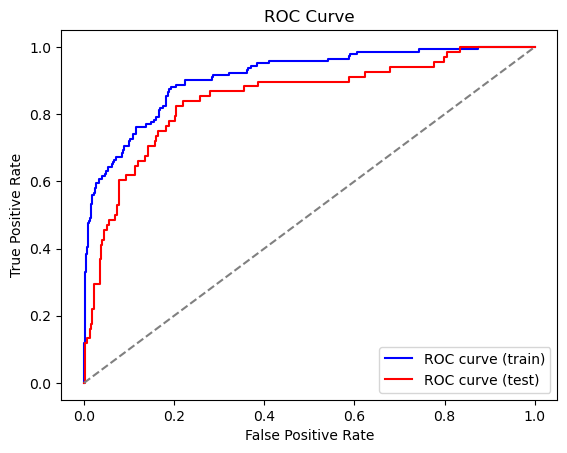

In [290]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label='ROC curve (train)')
plt.plot(fpr_test, tpr_test, color='red', label='ROC curve (test)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [291]:
# e. Validate the Model by Comparing Metrics
print("Train vs Test Metrics Comparison:")
print("Confusion Matrix (Train vs Test):")
print(conf_matrix_train)
print(conf_matrix_test)
print("Classification Report (Train vs Test):")
print(class_report_train)
print(class_report_test)
print("ROC AUC Score (Train vs Test):")
print(roc_auc_train)
print(roc_auc_test)

Train vs Test Metrics Comparison:
Confusion Matrix (Train vs Test):
[[735  20]
 [ 59  84]]
[[300  18]
 [ 35  33]]
Classification Report (Train vs Test):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       755
           1       0.81      0.59      0.68       143

    accuracy                           0.91       898
   macro avg       0.87      0.78      0.81       898
weighted avg       0.91      0.91      0.91       898

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       318
           1       0.65      0.49      0.55        68

    accuracy                           0.86       386
   macro avg       0.77      0.71      0.74       386
weighted avg       0.85      0.86      0.85       386

ROC AUC Score (Train vs Test):
0.9112582781456953
0.8486403995560488


In [292]:
# f. Provide Mathematical Equation of the Model
params = result.params
print("Mathematical Equation of the Model:")
equation = "logit(p) = " + " + ".join([f"{coef:.4f}*{name}" for name, coef in params.items()])
print(equation)


Mathematical Equation of the Model:
logit(p) = -14.0460*const + -0.0005*EmployeeNumber + -0.0626*Age + 0.0536*DistanceFromHome + -0.0255*JobLevel + -0.0000*MonthlySalary + 0.1801*NumCompaniesWorked + -0.0981*PercentSalaryHike_last_year + -0.7370*StockOptionLevel + -0.1972*TrainingTimesLastYear + -0.0414*YearsAtCompany + -0.1382*YearsInCurrentRole + 0.2917*YearsSinceLastPromotion + -0.1362*YearsWithCurrManager + -0.5004*Education_Below College + -0.0665*Education_College + -1.9106*Education_Doctor + -0.0664*Education_Master + -0.3742*EducationField_Life Sciences + -0.0980*EducationField_Marketing + 0.0516*EducationField_Medical + 0.0018*EducationField_Other + 1.1214*EducationField_Technical Degree + 0.3800*Gender_Male + 0.3810*MaritalStatus_Married + 0.7468*MaritalStatus_Single + 14.8420*Department_Research & Development + -7.7966*Department_Sales + 1.5382*BusinessTravel_Travel_Frequently + 0.5201*BusinessTravel_Travel_Rarely + 0.6302*JobInvolvement_x_Low + 0.1225*JobInvolvement_x_Mediu

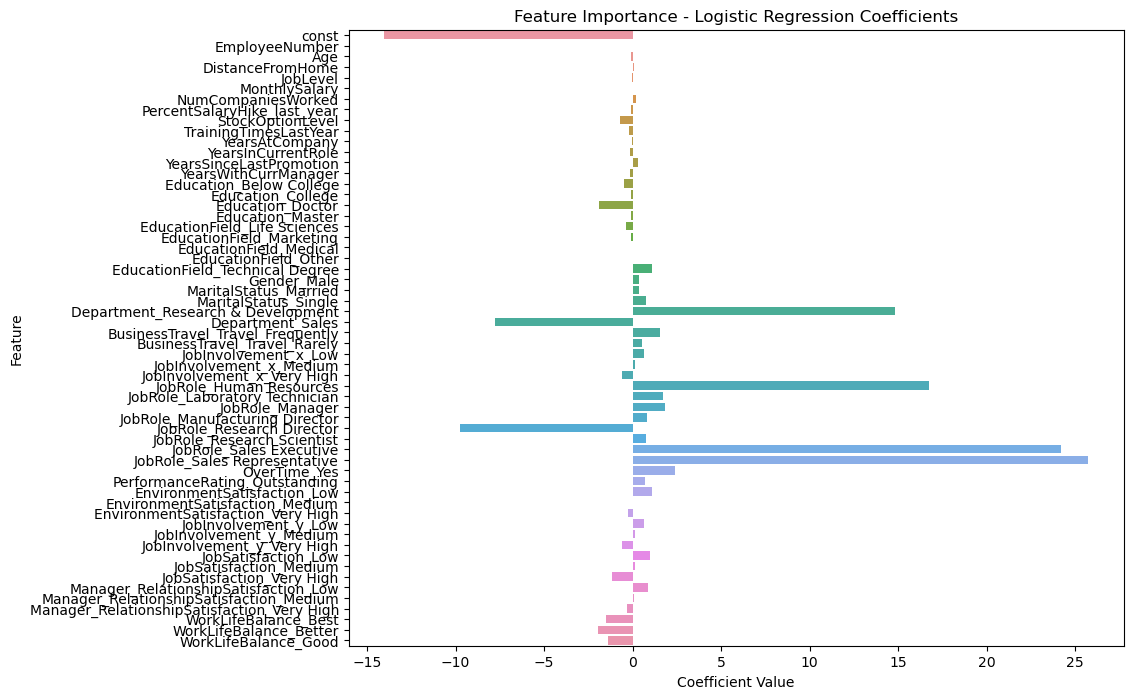

In [293]:
# g. Final outputs, Visualization, Insights, Recommendations
# 1. Feature Importance Visualization
params = result.params
plt.figure(figsize=(10, 8))
sns.barplot(x=params.values, y=params.index, orient='h')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression Coefficients')
plt.show()


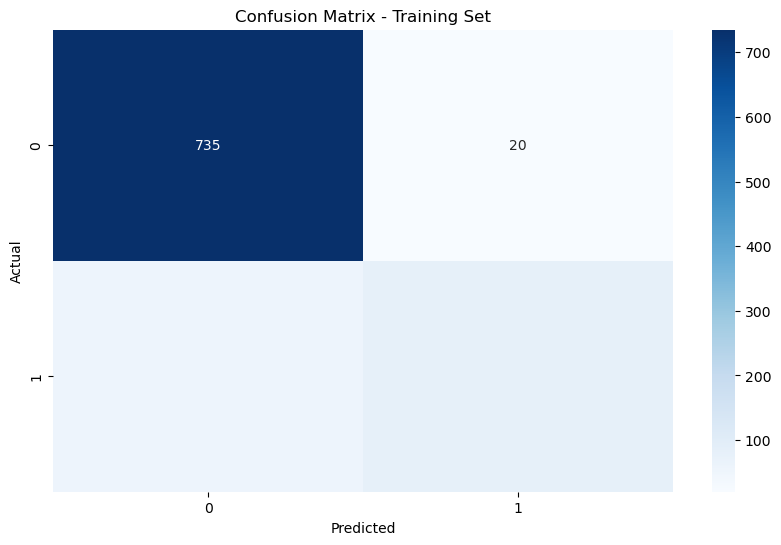

In [294]:
#Confusion Matrix Visualization for Training Set
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

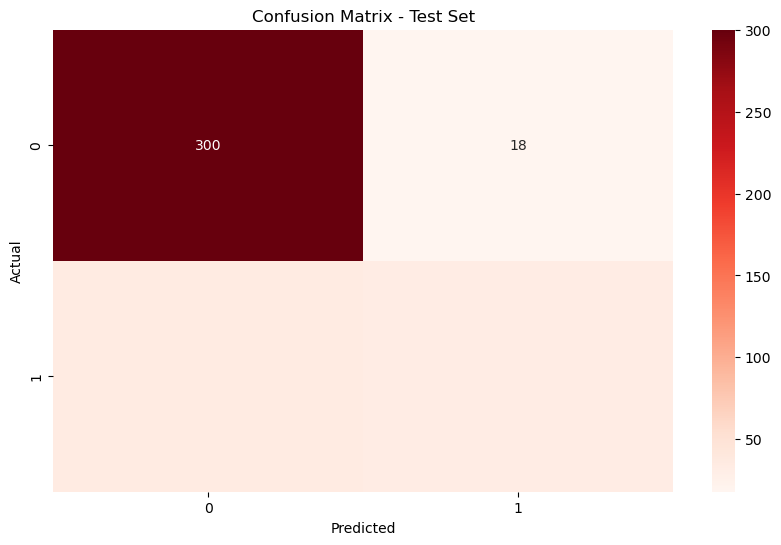

In [295]:
#Confusion Matrix Visualization for Test Set
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [296]:
#Create python pickle file of the model (optional)
model_filename = 'logistic_regression_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(result, file)

print(f"Model saved to {model_filename}")


Model saved to logistic_regression_model.pkl
